<font size="6"><center>***Metodos numéricos en finanzas***</center></font>

<font size="5"><center><span style="color:blue">***Nombre y Apellidos: Belén Rodríguez Llorente***</span></center></font>

## Importamos las librerías necesarias

In [ ]:
import numpy as np
import pandas as pd
from math import sin, cos, sqrt, log, exp, pi
import matplotlib.pyplot as plt
import scipy as sp
import math
import scipy.stats as stats
from scipy.stats import norm,t,chisquare
import seaborn as sns

<font size="6"><center><span style="color:blue">***Práctica 0: Generadores de números pseudoaleatorios***</span></center></font>

## 1. Método congruencial


Considerad los siguientes valores para los parámetros en el método congruencial:  
* m=2**(31)-1
* a=16807
* b=0  

y la semilla inicial en todos los casos será:  
* x0=123456789

In [ ]:
# Parámetros del método congruencial
seed=123456789
n=100
m=2**(31)-1
a=16807
b=0

Propuesta de respuesta del profesor:

In [ ]:
def congru(x0):
    m=2**(31)-1
    a=16807
    b=0
    x=(a*x0+b)%m
    x_u=x/m
    return(x,x_u)

In [ ]:
d = 100
x0 = 123456789
x_u = np.zeros(d)
for k in range(d):
    x0, x_u[k] = congru(x0)


#Media
media = np.mean(x_u)
varianzaXn = np.var(x_u, ddof=1)
print('Media', media)
print('Varianza', varianzaXn)
print('u1= %.8f u2= %.8f u3= %.8f ...' % (x_u[0],x_u[1],x_u[2]))

Media 0.4768269202191508
Varianza 0.09248359747373669
u1= 0.21841830 u2= 0.95631758 u3= 0.82950923 ...


1. Para comprobar que está correctamente programado, generar 100 valores U(0,1). Éstos deben cumplir:  

    * $\overline{x} = 0.47682692$
    * $S^2_n = 0.09155876$
    * $S^2_{n-1} = 0.09248360$
    * $u1 = 0.2184183 ~ u2 = 0.95631758 ~ u3 = 0.82950923 . . .$  
    

2. Justificar que los números generados proceden de una distribución U(0,1).

Mi respuesta:

In [ ]:
# Apartado 1: Generación de números aleatorios mediante método congruencial
def metodo_congruencial(seed, a, b, m, n):
    """Genera una secuencia de n números pseudoaleatorios U(0,1) usando un método congruencial lineal."""
    valores = []
    x0 = seed
    for _ in range(n):
        x = (a * x0 + b) % m
        x0=x
        valores.append(x / m)
    return np.array(valores)


# Generamos una secuencia inicial de números pseudoaleatorios
random_numbers = metodo_congruencial(seed, a, b, m, n)
print('Hemos generado' ,len(random_numbers),'números pseudoaleatorios.')
print('Los números pseudoaleatorios por el método congruencial son:',np.array(random_numbers))
print('La media de los números generados es:', np.mean(random_numbers))
print('La varianza de los números generados es:', np.var(random_numbers))
print('La varianza de los números generados (dividido por n-1) es:', np.var(random_numbers, ddof=1))

Hemos generado 100 números pseudoaleatorios.
Los números pseudoaleatorios por el método congruencial son: [0.2184183  0.95631758 0.82950923 0.56169544 0.41530708 0.06611873
 0.25757779 0.10995679 0.043829   0.63396571 0.06172723 0.44953896
 0.40130628 0.75467349 0.79728695 0.00183837 0.89750406 0.35075234
 0.09454475 0.01361689 0.85909686 0.84084745 0.12310392 0.00751236
 0.260303   0.91248371 0.11366405 0.35162866 0.82288732 0.26713227
 0.6920665  0.56166247 0.86121579 0.45379378 0.91197703 0.59791688
 0.18895469 0.76149206 0.39698848 0.18531412 0.57436586 0.36702667
 0.61720483 0.3615287  0.21293    0.71447121 0.11770687 0.29932915
 0.82500295 0.82466007 0.06186177 0.71078052 0.08828333 0.77799401
 0.74530307 0.30867492 0.89937309 0.76353672 0.76173065 0.40696964
 0.93874945 0.56208829 0.01782002 0.50110323 0.04190926 0.36885058
 0.2717236  0.85857256 0.02903656 0.01744228 0.15238379 0.11431867
 0.35390726 0.11930783 0.20665276 0.21292396 0.61294755 0.80951907
 0.58708963 0.21549164 

In [ ]:
# Apartado 2:

# Test de Kolmogorov-Smirnov para comprobar la uniformidad
stat_ks, p_ks = stats.kstest(random_numbers, 'uniform', args=(0, 1))  # Uniforme en [0,1]
print("Test de Kolmogorov-Smirnov para Uniforme [0,1]:")
print(f"Estadístico: {stat_ks:.4f}, p-valor: {p_ks:.4f}")
if p_ks > 0.05:
    print("No se rechaza la hipótesis nula: Los datos parecen uniformes.\n")
else:
    print("Se rechaza la hipótesis nula: Los datos no parecen uniformes.\n")

Test de Kolmogorov-Smirnov para Uniforme [0,1]:
Estadístico: 0.0769, p-valor: 0.5688
No se rechaza la hipótesis nula: Los datos parecen uniformes.



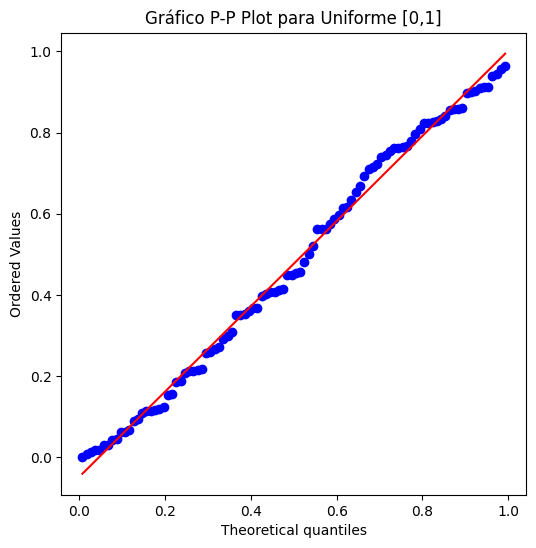

In [ ]:
# Gráfico P-P Plot para visualizar la uniformidad
plt.figure(figsize=(6, 6))
stats.probplot(random_numbers, dist="uniform", sparams=(0, 1), plot=plt)
plt.title("Gráfico P-P Plot para Uniforme [0,1]")
plt.show()

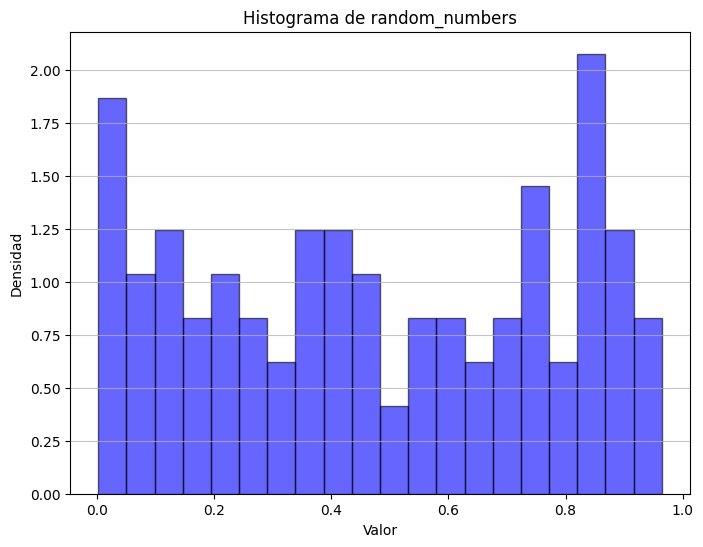

In [ ]:
# Crear un histograma
plt.figure(figsize=(8, 6))
plt.hist(random_numbers, bins=20, density=True, alpha=0.6, color='blue', edgecolor='black')
plt.title("Histograma de random_numbers")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.grid(axis='y', alpha=0.75)
plt.show()

## 2. Box-Müller


Profesor:

In [ ]:
def BoxMuller(x0):
    x0,u1=congru(x0)
    x0,u2=congru(x0)
    x=sqrt(-2*log(u1))*cos(2*pi*u2)
    y=sqrt(-2*log(u1))*sin(2*pi*u2)

    return(x,y,x0)

In [ ]:
x0 = 123456789
mu = 0
sigma = 1
d = 100
x = np.zeros(d)
y = np.zeros(d)

for i in range(d):
    x[i],y[i],x0 = BoxMuller(x0)


#Media
mediaX = np.mean(x)
varianzaX = np.var(x, ddof=1)
mediaY = np.mean(y)
varianzaY = np.var(y, ddof=1)
print('Media cos',mediaX)
print('Varianza x',varianzaX)
print('Media sin',mediaY)
print('Varianza y',varianzaY)
print('u1= %.8f u2= %.8f u3= %.8f ...' % (x[0],x[1],x[2]))
print('u1= %.8f u2= %.8f u3= %.8f ...' % (y[0],y[1],y[2]))

Media cos 0.027371357960748598
Varianza x 1.0905141204763558
Media sin -0.12201765379519719
Varianza y 1.0506256886858798
u1= 1.67904026 u2= -0.56605981 u3= 1.21293422 ...
u1= -0.47276880 u2= -0.23112413 u3= 0.53503714 ...


1. Para comprobar que está correctamente programado, generar 100 valores N(0,1). Éstos deben cumplir:

    * $\overline{x} = 0.02737136$
    * $S^2_n = 1.079609$
    * $S^2_{n-1} = 1.090514$
    * $u1 = 1.679040257 ~ u2 = −0.566059812 ~ u3 = 1.212934217 . . .$
    * $\overline{y} = −0.1220177$
    * $S^2_n = 1.040119$
    * $S^2_{n-1} = 1.050626$
    * $u1 = −0.47276880 ~ u2 = −0.23112413 ~ u3 = 0.53503714 . . .$  
    

2. Justificar que los números generados proceden de una distribución N(0,1).

Mi respuesta:

In [ ]:
# Apartado 1: generación de números con el método de Box-Müller

def box_muller(seed, a, b, m, n):
    """Transforma números U(0,1) en N(0,1) usando Box-Müller."""
    uniformes = metodo_congruencial(seed, a, b, m, 2*n)
    x = np.array([])
    y = np.array([])

    recorre = [[i ,i+1] for i in range(0,2*n,2)]

    for i, j in recorre:
        x = np.append(x, np.sqrt(-2 * np.log(uniformes[i])) * np.cos(2 * np.pi * uniformes[j]))
        y = np.append(y, np.sqrt(-2 * np.log(uniformes[i])) * np.sin(2 * np.pi * uniformes[j]))
    return x, y

# Generar valores N(0,1)
x_normales, y_normales = box_muller(seed, a, b, m, n)

print(f'Hemos generado {len(x_normales) + len(y_normales)} números pseudoaleatorios.')
print('Los números x pseudoaleatorios por el método Box-Müller son:', x_normales)
print('Los números y pseudoaleatorios por el método Box-Müller son:', y_normales)
print('La media de los números x generados es:', np.mean(x_normales))
print('La media de los números y generados es:', np.mean(y_normales))
print('La varianza de los números x generados es:', np.var(x_normales))
print('La varianza de los números y generados es:', np.var(y_normales))
print('La varianza de los números x generados (dividido por n-1) es:', np.var(x_normales, ddof=1))
print('La varianza de los números y generados (dividido por n-1) es:', np.var(y_normales, ddof=1))

Hemos generado 200 números pseudoaleatorios.
Los números x pseudoaleatorios por el método Box-Müller son: [ 1.67904026 -0.56605981  1.21293422  1.26938063 -1.66608667 -2.24246404
  0.03967492  0.6730682  -0.27512735  2.16400479  0.29778523  2.04453558
  1.39881853 -1.24298511 -0.06708366 -0.79439604 -0.52376847 -0.35056721
  0.13169976  0.53737987 -0.70641641 -0.6334466  -0.38938399 -0.63093506
  0.28041629 -0.57548957  0.38554176 -0.27631976  0.03912506 -0.61529168
 -0.32883301 -2.83804127 -1.71095126  1.01779166  2.64456479  1.46052082
  1.05496761  0.40994887  0.36144829  0.2220253  -0.12132021  0.77779388
  0.28288222  1.12354752 -0.31784861 -0.2234095   0.73471469  0.58891693
 -0.74536208 -0.76871698  0.54824809 -0.40246938 -0.46212424 -0.81995909
  1.16268661  0.63257199 -0.51148012  0.28192977  1.08256323  0.83468266
  0.67428467  2.13233035 -0.30198132 -0.08590341 -2.29430427 -2.1445972
 -0.00796366  0.8119415   1.1405029   0.37981281  1.52867365  0.71297777
 -0.44706854  0.135

In [ ]:
# Apartado 2: Estudiemos la normalidad

# Test de Kolmogorov-Smirnov (KS) para los x_normales
stat_ks, p_ks = stats.kstest(x_normales, 'norm')
print("Test de Kolmogorov-Smirnov:")
print(f"Estadístico: {stat_ks:.4f}, p-valor: {p_ks:.4f}")
if p_ks > 0.05:
    print("No se rechaza la hipótesis nula: Los datos parecen normales.\n")
else:
    print("Se rechaza la hipótesis nula: Los datos no parecen normales.\n")

Test de Kolmogorov-Smirnov:
Estadístico: 0.0700, p-valor: 0.6855
No se rechaza la hipótesis nula: Los datos parecen normales.



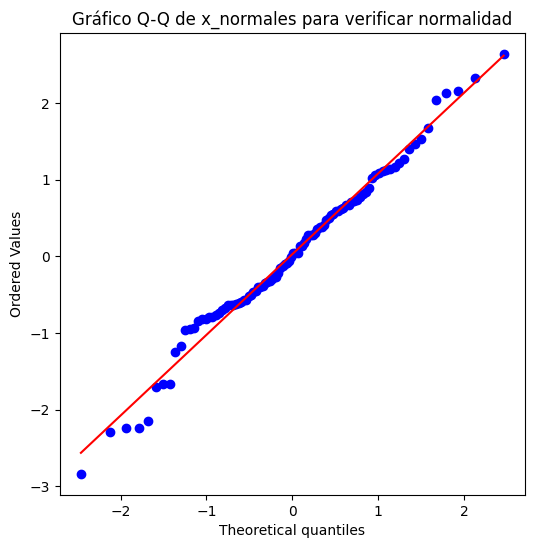

In [ ]:
# Gráfico Q-Q Plot, así visualizamos la normalidad de x_normales
plt.figure(figsize=(6, 6))
stats.probplot(x_normales, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de x_normales para verificar normalidad")
plt.show()

## 3. Método Marsaglia


Profesor:

In [ ]:
def Marsaglia(x0):
    while True:
        x01, u1 = congru(x0)
        x0, u2 = congru(x01)
        v1 = 2*u1-1
        v2 = 2*u2-1
        R2 = v1**2 + v2**2
        if R2<=1:
            y = sqrt((-2*log(R2))/R2)
            x1 = v1*y
            x2 = v2*y
            return(x1,x2,x0)

In [ ]:
x0 = 123456789
d = 100
x = np.zeros(d)
y = np.zeros(d)
for i in range(d):
    x[i],y[i],x0 = Marsaglia(x0)

#Media
mediaX = np.mean(x)
varianzaX = np.var(x, ddof=1)
mediaY = np.mean(y)
varianzaY = np.var(y, ddof=1)
print('Media cos',mediaX)
print('Varianza x',varianzaX)
print('Media sin',mediaY)
print('Varianza y',varianzaY)
print('u1= %.8f u2= %.8f u3= %.8f ...' % (x[0],x[1],x[2]))
print('u1= %.8f u2= %.8f u3= %.8f ...' % (y[0],y[1],y[2]))

Media cos 0.215905222427565
Varianza x 0.7146606838685954
Media sin -0.17328006153554742
Varianza y 0.932232837378258
u1= 1.24295692 u2= -0.13445768 u3= -0.30786186 ...
u1= 0.23272421 u2= -0.68882581 u3= -0.49533180 ...


1. Para comprobar que está correctamente programado, generar 100 valores N(0,1). Éstos deben cumplir:

    * $\overline{x} = 0.2159052$
    * $S^2_n = 0.7075141$
    * $S^2_{n-1} = 0.7146607$
    * $u1 = 1.24295692 ~ u2 = −0.13445768 ~ u3 = −0.30786186 . . .$
    * $\overline{y} = −0.1732801$
    * $S^2_n = 0.9229105$
    * $S^2_{n-1} = 0.9322328$
    * $u1 = 0.23272421 ~ u2 = −0.68882581 ~ u3 = −0.49533179 . . .$
    
    
2. Justificar que los números generados proceden de una distribución N(0,1).


Mi respuesta:

In [ ]:
# Apartado 1: generación de números con el método de Marsaglia

def metodo_marsaglia(seed, a, b, m, n):
    """Genera n valores N(0,1) usando el método Marsaglia con un generador congruencial para las uniformes."""
    x = []
    y = []
    total_generados = 0

    # Generar una lista inicial de números uniformes
    uniformes = metodo_congruencial(seed, a, b, m, 10 * n)  # Generar un número inicial grande
    indice = 0  # Índice para recorrer la lista de uniformes

    while len(x) < n or len(y) < n:
        if indice + 2 > len(uniformes):  # Si necesitamos más números, generarlos
            seed = int((uniformes[-1] * m))  # Actualizar la semilla con el último valor
            uniformes = np.concatenate((uniformes, metodo_congruencial(seed, a, b, m, 2 * n)))

        # Obtener dos números uniformes
        u1, u2 = uniformes[indice], uniformes[indice + 1]
        indice += 2  # Avanzar el índice


        # Transformar a coordenadas polares
        v1 = 2 * u1 - 1
        v2 = 2 * u2 - 1
        R2 = v1**2 + v2**2

        if R2 <= 1:
            factor = np.sqrt(-2 * np.log(R2) / R2)
            x.append(v1 * factor)
            y.append(v2 * factor)

        total_generados += 2

    return np.array(x[:n]), np.array(y[:n])

In [ ]:
x,y = metodo_marsaglia(seed, a, b, m, n)

print("Valores generados (N(0,1)):", x)
print("Cantidad de valores generados:", len(x))
print('La media de los números generados es:', np.mean(x))
print('La varianza de los números generados es:', np.var(x))
print('La varianza de los números generados (dividido por n-1) es:', np.var(x, ddof=1))
print("Valores generados (N(0,1)):", y)
print("Cantidad de valores generados:", len(y))
print('La media de los números generados es:', np.mean(y))
print('La varianza de los números generados es:', np.var(y))
print('La varianza de los números generados (dividido por n-1) es:', np.var(y, ddof=1))

Valores generados (N(0,1)): [ 1.24295692 -0.13445768 -0.30786186 -0.43070798 -0.70297725 -0.56196714
  0.75701075  0.1439025  -0.21771378 -0.81192091  0.77440055  1.81427631
  1.11698397  0.79317065 -0.69713916 -0.39944251  1.06420518  1.3010207
 -0.92475919 -0.67835188  0.41186691 -0.30148015 -0.13321261  1.08634591
  0.35006915  1.44481459  0.68817079 -0.38098739 -0.42191721 -0.43277573
 -0.32358437 -0.63502767  0.44277646  0.42175649  0.92186181 -0.16672618
  0.02079113 -0.16978845  0.68192542 -0.29105237  1.66295127  1.7300859
  0.15342184 -0.73371166  1.24470086  0.5925855  -0.36510628  0.15722001
 -0.72540192 -0.41464388 -0.36366292  0.1350795   0.54427911 -0.58641784
 -0.26612579  0.84876529 -0.0926381  -0.33185658 -0.04346397  0.95063858
  0.50927882  0.98920793  1.79016715  2.24782345 -0.81942769  1.41119591
  1.78392422 -1.14661223  0.07721841 -1.00962311 -0.03206346 -1.76071652
  1.23814646  0.20984844  0.09765076  2.04777617 -0.32997079  0.39909559
  0.77929081  0.36782265 

In [ ]:
# Apartado 2: Estudiemos la normalidad

# Test de Kolmogorov-Smirnov para los x:
stat_ks, p_ks = stats.kstest(x, 'norm')
print("Test de Kolmogorov-Smirnov:")
print(f"Estadístico: {stat_ks:.4f}, p-valor: {p_ks:.4f}")
if p_ks > 0.05:
    print("No se rechaza la hipótesis nula: Los datos parecen normales.\n")
else:
    print("Se rechaza la hipótesis nula: Los datos no parecen normales.\n")

Test de Kolmogorov-Smirnov:
Estadístico: 0.1526, p-valor: 0.0169
Se rechaza la hipótesis nula: Los datos no parecen normales.



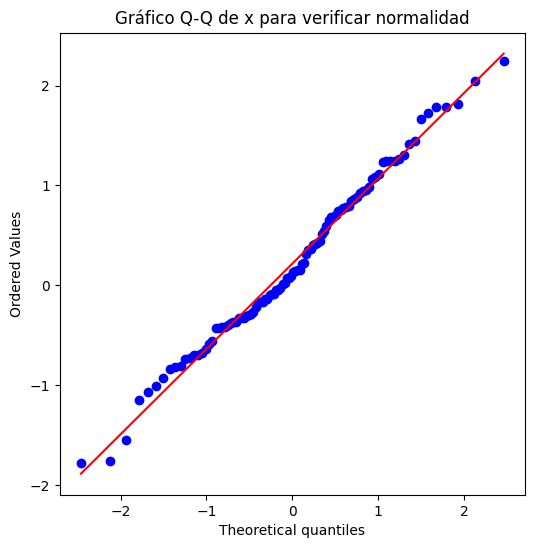

In [ ]:
# Gráfico Q-Q Plot, así visualizamos la normalidad de x
plt.figure(figsize=(6, 6))
stats.probplot(x, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de x para verificar normalidad")
plt.show()

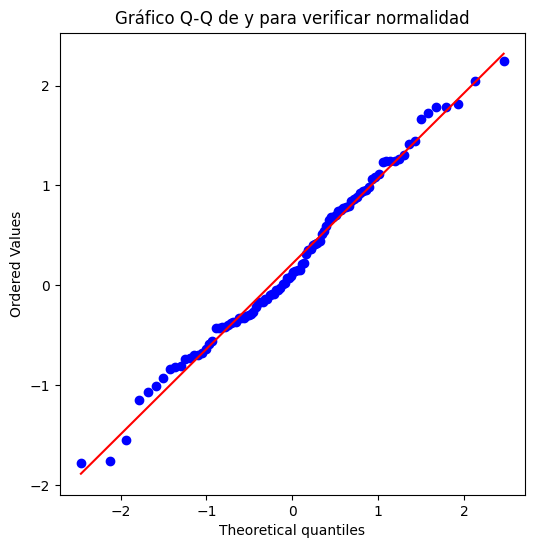

In [ ]:
# Gráfico Q-Q Plot, así visualizamos la normalidad de x
plt.figure(figsize=(6, 6))
stats.probplot(x, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de y para verificar normalidad")
plt.show()

In [ ]:
# Test de Kolmogorov-Smirnov para los y:
stat_ks, p_ks = stats.kstest(x, 'norm')
print("Test de Kolmogorov-Smirnov:")
print(f"Estadístico: {stat_ks:.4f}, p-valor: {p_ks:.4f}")
if p_ks > 0.05:
    print("No se rechaza la hipótesis nula: Los datos parecen normales.\n")
else:
    print("Se rechaza la hipótesis nula: Los datos no parecen normales.\n")

Test de Kolmogorov-Smirnov:
Estadístico: 0.1526, p-valor: 0.0169
Se rechaza la hipótesis nula: Los datos no parecen normales.



## 2. Box-Müller antitéticas

Profesor:

In [ ]:
def boxmuller_anti(mu,sigma,x0,a,b,m):

    x0,u_1=congru(x0,a,b,m)
    x0,u_2=congru(x0,a,b,m)

    x=sqrt(-2*log(1-u_1))*cos(2*pi*(1-u_2))
    y=sqrt(-2*log(1-u_1))*sin(2*pi*(1-u_2))

    x=sigma*x + mu
    y=sigma*y + mu

    return(x0,x,y)

Mi respuesta:

In [ ]:
def box_muller_antiteticas(seed, a, b, m, n):
    """Transforma números U(0,1) en N(0,1) usando Box-Müller."""
    uniformes = metodo_congruencial(seed, a, b, m, 2*n)
    x = np.array([])
    y = np.array([])

    recorre = [[i ,i+1] for i in range(0,2*n,2)]

    for i, j in recorre:
        x = np.append(x, np.sqrt(-2 * np.log(1-uniformes[i])) * np.cos(2 * np.pi * (1-uniformes[j])))
        y = np.append(y, np.sqrt(-2 * np.log(1-uniformes[i])) * np.sin(2 * np.pi * (1-uniformes[j])))
    return x, y

In [ ]:
# Generar valores N(0,1)
x_normales_antiteticas, y_normales_antiteticas = box_muller_antiteticas(seed, a, b, m, n)

print(f'Hemos generado {len(x_normales) + len(y_normales)} números pseudoaleatorios.')
print('Los números x pseudoaleatorios por el método Box-Müller son:', x_normales)
print('Los números y pseudoaleatorios por el método Box-Müller son:', y_normales)
print('La media de los números x generados es:', np.mean(x_normales))
print('La media de los números y generados es:', np.mean(y_normales))
print('La varianza de los números x generados es:', np.var(x_normales))
print('La varianza de los números y generados es:', np.var(y_normales))
print('La varianza de los números x generados (dividido por n-1) es:', np.var(x_normales, ddof=1))
print('La varianza de los números y generados (dividido por n-1) es:', np.var(y_normales, ddof=1))

Hemos generado 200 números pseudoaleatorios.
Los números x pseudoaleatorios por el método Box-Müller son: [ 1.67904026 -0.56605981  1.21293422  1.26938063 -1.66608667 -2.24246404
  0.03967492  0.6730682  -0.27512735  2.16400479  0.29778523  2.04453558
  1.39881853 -1.24298511 -0.06708366 -0.79439604 -0.52376847 -0.35056721
  0.13169976  0.53737987 -0.70641641 -0.6334466  -0.38938399 -0.63093506
  0.28041629 -0.57548957  0.38554176 -0.27631976  0.03912506 -0.61529168
 -0.32883301 -2.83804127 -1.71095126  1.01779166  2.64456479  1.46052082
  1.05496761  0.40994887  0.36144829  0.2220253  -0.12132021  0.77779388
  0.28288222  1.12354752 -0.31784861 -0.2234095   0.73471469  0.58891693
 -0.74536208 -0.76871698  0.54824809 -0.40246938 -0.46212424 -0.81995909
  1.16268661  0.63257199 -0.51148012  0.28192977  1.08256323  0.83468266
  0.67428467  2.13233035 -0.30198132 -0.08590341 -2.29430427 -2.1445972
 -0.00796366  0.8119415   1.1405029   0.37981281  1.52867365  0.71297777
 -0.44706854  0.135

## 2. Marsaglia antitéticas

Profesor:

In [ ]:
def marsaglia_anti(mu,sigma,x0,a,b,m):
    Rcuad=2;

    while Rcuad > 1:
        x0,u1=congru(x0, a ,b, m)
        x0,u2=congru(x0, a ,b, m)
        v1=2*(1-u1)-1
        v2=2*(1-u2)-1
        Rcuad=v1**2+v2**2

    y=sqrt(-2*log(Rcuad)/Rcuad);
    x1=v1*y;
    x2=v2*y;

    return(x0,x1,x2)

Mi respuesta:

In [ ]:
def metodo_marsaglia_antiteticas(seed, a, b, m, n):
    """Genera n valores N(0,1) usando el método Marsaglia con números antitéticos."""
    uniformes = metodo_congruencial(seed, a, b, m, 3 * n)  # Generar suficientes uniformes

    x = []
    y = []

    i = 0
    while len(x) < n or len(y) < n:
        if i + 1 >= len(uniformes):  # Si no hay suficientes números uniformes, generamos más
            seed = int((uniformes[-1] * m))  # Actualizamos la semilla
            uniformes = np.concatenate((uniformes, metodo_congruencial(seed, a, b, m, 3 * n)))

        # Valores uniformes originales
        u1, u2 = uniformes[i], uniformes[i + 1]

        # Valores antitéticos
        u1_ant, u2_ant = 1 - u1, 1 - u2

        # Generamos los valores antitéticos para (u1_ant, u2_ant)
        v1_ant, v2_ant = 2 * u1_ant - 1, 2 * u2_ant - 1
        R2_ant = v1_ant**2 + v2_ant**2

        if R2_ant <= 1:
            factor_ant = np.sqrt(-2 * np.log(R2_ant) / R2_ant)
            x.append(v1_ant * factor_ant)
            y.append(v2_ant * factor_ant)

        i += 2  # Avanzamos al siguiente par de números

    return np.array(x[:n]), np.array(y[:n])

In [ ]:
x_ant,y_ant = metodo_marsaglia_antiteticas(seed, a, b, m, n)

print("Valores generados (N(0,1)):", x_ant)
print("Cantidad de valores generados:", len(x_ant))
print('La media de los números generados es:', np.mean(x_ant))
print('La varianza de los números generados es:', np.var(x_ant))
print('La varianza de los números generados (dividido por n-1) es:', np.var(x_ant, ddof=1))
print("Valores generados (N(0,1)):", y_ant)
print("Cantidad de valores generados:", len(y_ant))
print('La media de los números generados es:', np.mean(y_ant))
print('La varianza de los números generados es:', np.var(y_ant))
print('La varianza de los números generados (dividido por n-1) es:', np.var(y_ant, ddof=1))

Valores generados (N(0,1)): [-1.24295692  0.13445768  0.30786186  0.43070798  0.70297725  0.56196714
 -0.75701075 -0.1439025   0.21771378  0.81192091 -0.77440055 -1.81427631
 -1.11698397 -0.79317065  0.69713916  0.39944251 -1.06420518 -1.3010207
  0.92475919  0.67835188 -0.41186691  0.30148015  0.13321261 -1.08634591
 -0.35006915 -1.44481459 -0.68817079  0.38098739  0.42191721  0.43277573
  0.32358437  0.63502767 -0.44277646 -0.42175649 -0.92186181  0.16672618
 -0.02079113  0.16978845 -0.68192542  0.29105237 -1.66295127 -1.7300859
 -0.15342184  0.73371166 -1.24470086 -0.5925855   0.36510628 -0.15722001
  0.72540192  0.41464388  0.36366292 -0.1350795  -0.54427911  0.58641784
  0.26612579 -0.84876529  0.0926381   0.33185658  0.04346397 -0.95063858
 -0.50927882 -0.98920793 -1.79016715 -2.24782345  0.81942769 -1.41119591
 -1.78392422  1.14661223 -0.07721841  1.00962311  0.03206346  1.76071652
 -1.23814646 -0.20984844 -0.09765076 -2.04777617  0.32997079 -0.39909559
 -0.77929081 -0.36782265 

## 4. t-Student


Profesor:

In [ ]:
def Gamma(p,a,x0):
    u = np.zeros(int(p))
    suma = 0
    for i in range(int(p)):
        x0, v = congru(x0)
        u[i] = log(v)

    x = -sum(u)/a
    return(x,x0)

def chi_cuadrado(n,x0):
    if n%2==0:
        X,x0 = Gamma(int(n/2),1/2,x0)
        return(X,x0)
    else:
        x,x0 = Gamma(int((n-1))/2,1/2,x0)
        y,Z,x0 = BoxMuller(x0)
        X = x + Z**2
        return(X,x0)

def t_Student(n,x0):
    x,Z,x0 = BoxMuller(x0)
    Y,x0 = chi_cuadrado(n,x0)
    X = Z/sqrt(Y/n)
    return(X,x0)

In [ ]:
d = 100
n = 10
x0=123456789
x = np.zeros(d)
for i in range(d):
    x[i],x0 = t_Student(n,x0)


print(len(x))

#Media
print('los numeros de la t-student son:', x)
media = np.mean(x)
varianzaXn = np.var(x, ddof=1)
print('Media', media)
print('Varianza', varianzaXn)
print('u1= %.8f u2= %.8f u3= %.8f ...' % (x[0],x[1],x[2]))

100
los numeros de la t-student son: [-0.44219972  0.55841105  0.00616089  0.29767311  0.98733973  0.99819081
  0.72114562  0.24835265 -0.42468673  0.21592085  1.09642712 -0.43082337
 -0.16309032  0.59233331  0.62624071 -0.37164644  2.14664049 -0.26180971
 -0.05126239  0.12023959 -1.30366339 -0.51601371  0.22599402  1.20698967
 -0.94080733 -0.4016015  -1.67355429 -1.68417666  0.82241756 -1.12468477
  0.11805974  0.10832159  0.13147547  1.07216925  0.14728583 -0.4072967
  0.52692056  1.53868831  2.333817   -1.23153722  0.18624111  0.4568217
  1.19534954 -0.58455845 -0.24163798 -0.02123398  1.41613996 -0.27852672
  0.18539303 -2.69528588  0.071069    0.04791396  1.90493847 -0.82579794
  0.26857898 -0.55535342 -0.72667888  0.00416657 -1.27648167 -3.03096659
 -0.80613942 -1.47593575  1.45561311 -0.30216114 -4.00264123  1.29649861
 -1.67570542  1.85958178  0.19461696 -0.65726757 -0.36091934  2.04309924
 -2.45765937  0.70661209  0.95251908 -0.22700673 -1.95744233 -0.5617158
 -1.71119343  1.0

Para comprobar que está correctamente programado, generar 100 valores de la variable aleatoria $t_{10}$.
Éstos deben cumplir:
* $\overline{x} = −0.00024283$
* $S^2_n = 1.515859$
* $S^2_{n-1} = 1.531171$
* $u1 = −0.442199721 ~ u2 = 0.558411054 ~ u3 = 0.006160887 . . .$


<font size="6"><center><span style="color:blue">***Práctica 1***</span></center></font>

1. Generar un movimiento browniano unidimensional para T=100 con ∆𝑡=1 según la expresión:

<font size="3"><center>$X \leftarrow X + \sqrt{\Delta t } Z$ donde $Z \sim \mathcal{N}(0,1)$</center></font>

In [ ]:
def movimiento_browniano(seed, a, b, m, T, dt):
    """
    Genera un movimiento browniano unidimensional.

    Args:
        seed: Semilla para el generador congruencial.
        a, b, m: Parámetros del generador congruencial.
        T: Tiempo total del movimiento browniano.
        dt: Incremento de tiempo.

    Returns:
        Una lista con las posiciones del movimiento browniano.
    """
    n = T  # Número de pasos
    Z, _ = box_muller(seed, a, b, m, n)  # Generamos n valores normales
    X = [0]  # Posición inicial

    for i in range(n):
        X.append(X[-1] + np.sqrt(dt) * Z[i])  # Actualizamos la posición

    return np.array(X)

Trayectoria del movimiento browniano: [ 0.          1.67904026  1.11298044  2.32591466  3.59529529  1.92920862
 -0.31325542 -0.2735805   0.39948769  0.12436034  2.28836513  2.58615036
  4.63068594  6.02950447  4.78651936  4.7194357   3.92503967  3.4012712
  3.05070398  3.18240374  3.71978361  3.0133672   2.3799206   1.99053662
  1.35960156  1.64001785  1.06452828  1.45007004  1.17375028  1.21287534
  0.59758366  0.26875065 -2.56929062 -4.28024188 -3.26245022 -0.61788544
  0.84263538  1.89760299  2.30755185  2.66900015  2.89102545  2.76970524
  3.54749912  3.83038133  4.95392885  4.63608024  4.41267074  5.14738543
  5.73630236  4.99094028  4.2222233   4.77047138  4.368002    3.90587776
  3.08591867  4.24860529  4.88117727  4.36969716  4.65162693  5.73419016
  6.56887282  7.24315749  9.37548784  9.07350652  8.98760311  6.69329884
  4.54870164  4.54073798  5.35267948  6.49318238  6.8729952   8.40166885
  9.11464662  8.66757807  8.80266186  8.12727551 10.4587354   9.63718968
  8.69046845  

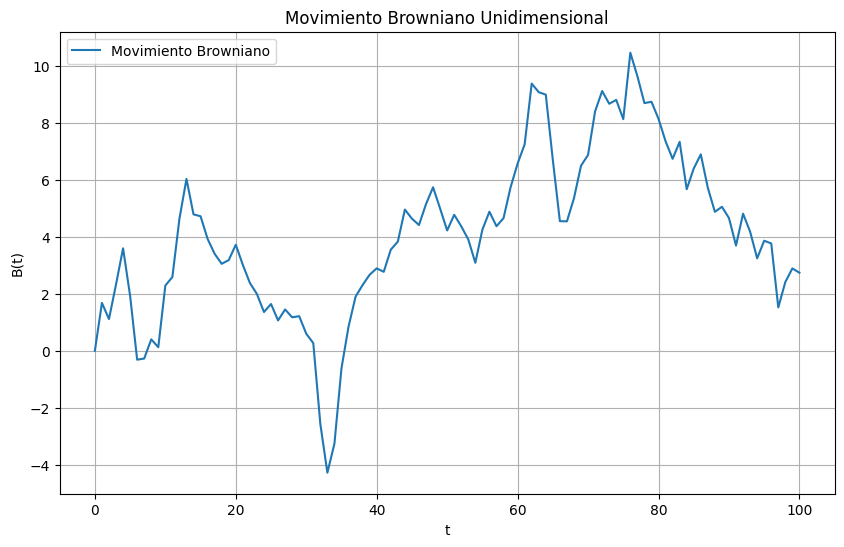

In [ ]:
T = 100  # Tiempo total
dt = 1   # Incremento de tiempo

# Generar el movimiento browniano
trayectoria = movimiento_browniano(seed, a, b, m, T, dt)

# Resultados
print("Trayectoria del movimiento browniano:", trayectoria)

# Graficar
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(T + 1), trayectoria, label="Movimiento Browniano")
plt.title("Movimiento Browniano Unidimensional")
plt.xlabel("t")
plt.ylabel("B(t)")
plt.grid()
plt.legend()
plt.show()

2. Generar 4 movimientos brownianos usando los valores de la distribución Normal generados mediante el seno y coseno del método de Box-Müller y también con variables antitéticas.

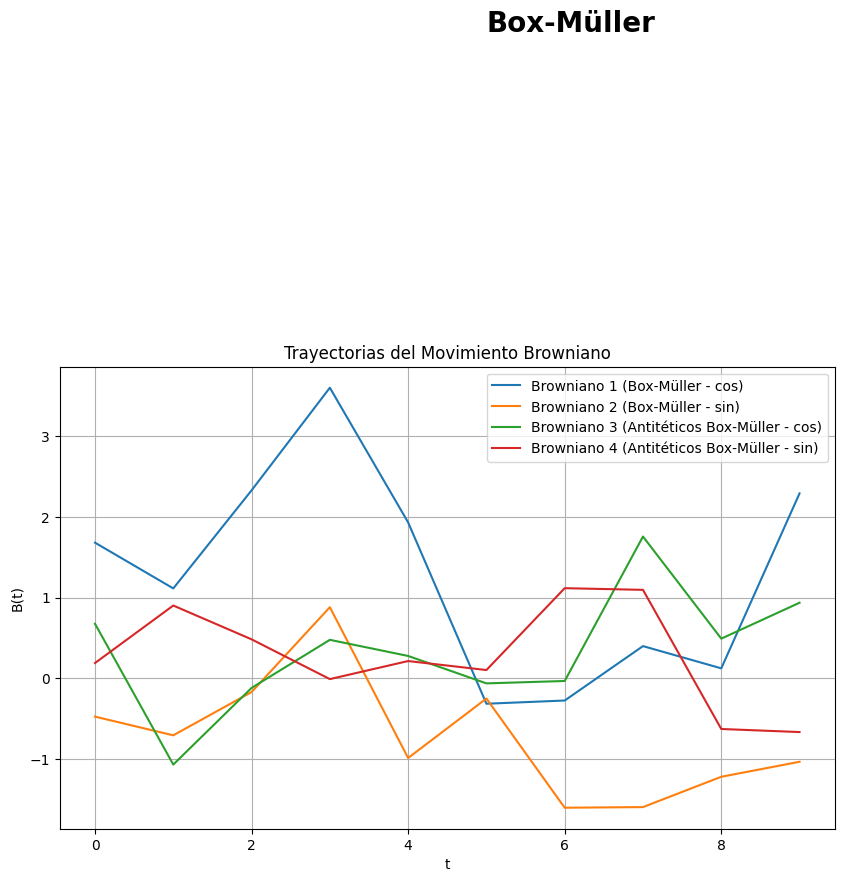

In [ ]:
pasos = 100  # Tiempo total
dt = 1   # Incremento de tiempo
n_trayectorias = 2  # Número de trayectorias base (se duplican con antitéticas)

# Generar números normales
normales_x_bm, normales_y_bm = box_muller(seed, a, b, m, n)
normales_x_ant, normales_y_ant = box_muller_antiteticas(seed, a, b, m, n)

# Crear trayectorias de movimientos brownianos
def crear_browniano(normales_x, normales_y, pasos, dt):
    normales_x = normales_x[:pasos]
    normales_y = normales_y[:pasos]
    browniano_x = np.cumsum(normales_x * np.sqrt(dt))
    browniano_y = np.cumsum(normales_y * np.sqrt(dt))
    return browniano_x, browniano_y

# Generar movimientos brownianos
browniano_1, browniano_2 = crear_browniano(normales_x_bm, normales_y_bm, pasos, dt)
browniano_3, browniano_4 = crear_browniano(normales_x_ant, normales_y_ant, pasos, dt)

# Graficar resultados si se solicita

plt.figure(figsize=(10, 6))
plt.plot(browniano_1, label="Browniano 1 (Box-Müller - cos)")
plt.plot(browniano_2, label="Browniano 2 (Box-Müller - sin)")
plt.plot(browniano_3, label="Browniano 3 (Antitéticos Box-Müller - cos)")
plt.plot(browniano_4, label="Browniano 4 (Antitéticos Box-Müller - sin)")
plt.title("Trayectorias del Movimiento Browniano")
plt.xlabel("t")
plt.ylabel("B(t)")
legend = plt.legend()
legend_box = legend.get_bbox_to_anchor()
plt.text(5,8, 'Box-Müller', fontsize=20, weight='bold', color='black')
plt.grid()
plt.show()

3. Generar 4 movimientos brownianos usando los valores de la ditribución normal generados mediante el método de Marsaglia y también con variables antitéticas.

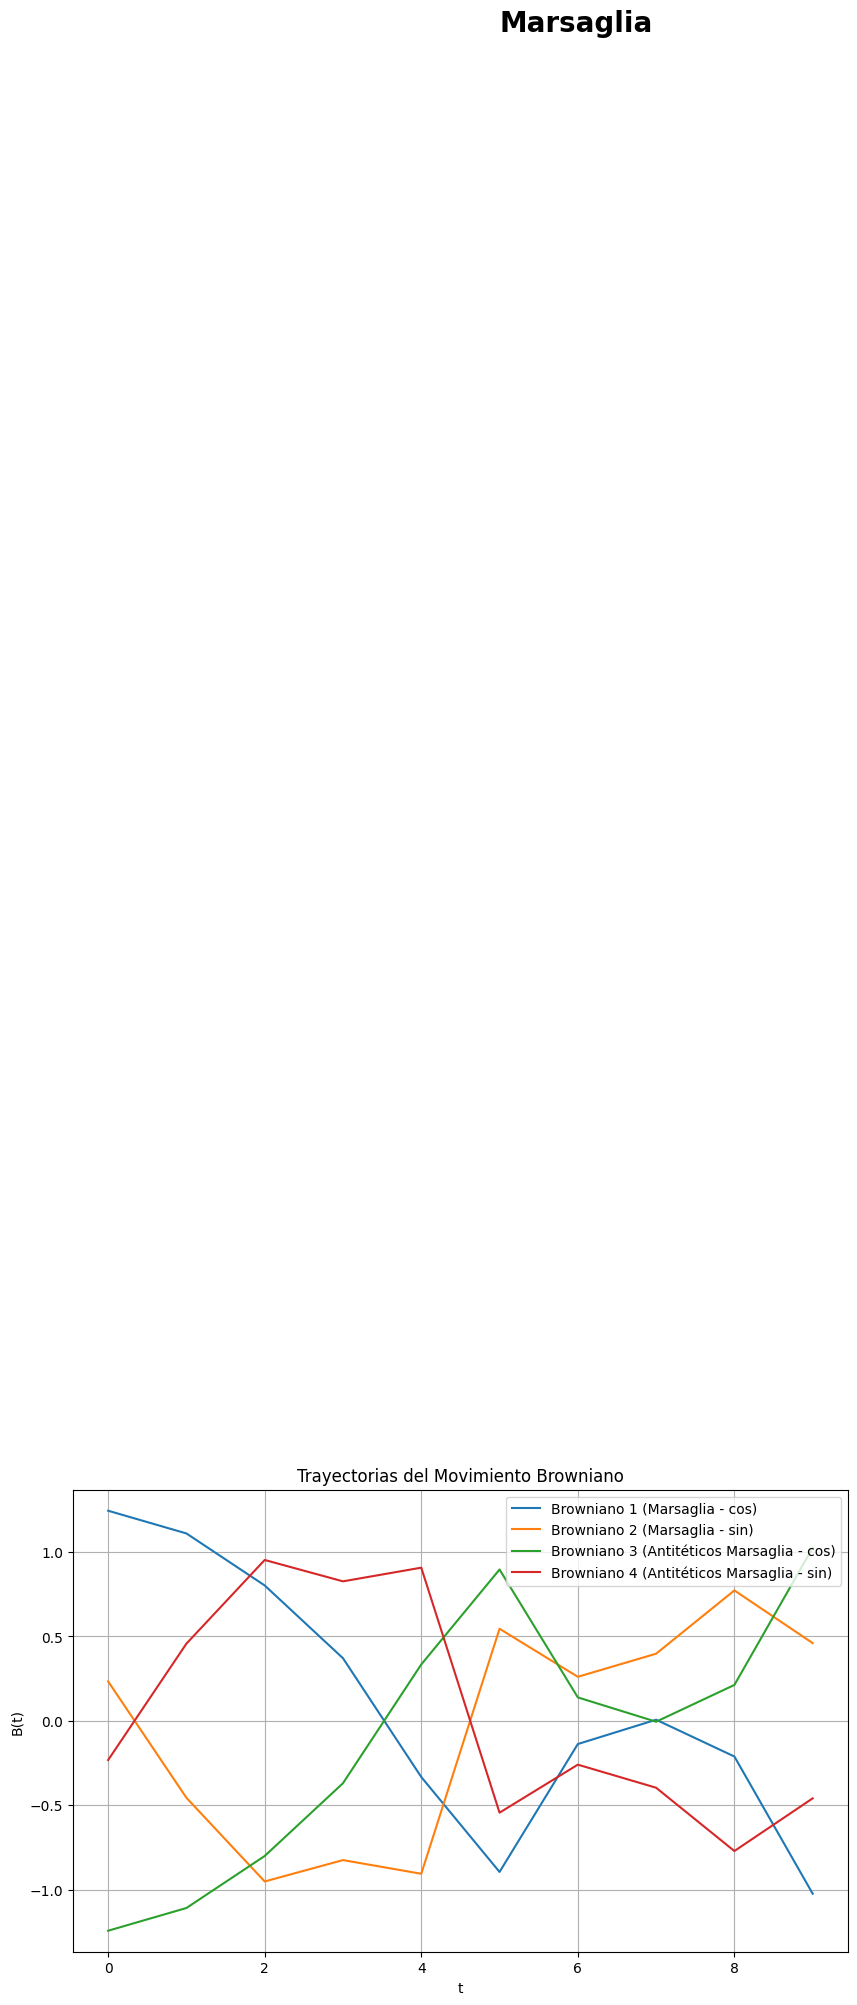

In [ ]:
# Generar números normales
normales_x_m, normales_y_m = metodo_marsaglia(seed, a, b, m, n)
normales_x_mant, normales_y_mant = metodo_marsaglia_antiteticas(seed, a, b, m, n)

# Crear trayectorias de movimientos brownianos
def crear_browniano1(normales_x, normales_y, pasos, dt):
    normales_x_m = normales_x[:pasos]
    normales_y_m = normales_y[:pasos]
    browniano_x = np.cumsum(normales_x_m * np.sqrt(dt))
    browniano_y = np.cumsum(normales_y * np.sqrt(dt))
    return browniano_x, browniano_y

# Crear trayectorias de movimientos brownianos
browniano_1m, browniano_2m = crear_browniano1(normales_x_m, normales_y_m, pasos, dt)
browniano_3m, browniano_4m = crear_browniano1(normales_x_mant, normales_y_mant, pasos, dt)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(browniano_1m, label="Browniano 1 (Marsaglia - cos)")
plt.plot(browniano_2m, label="Browniano 2 (Marsaglia - sin)")
plt.plot(browniano_3m, label="Browniano 3 (Antitéticos Marsaglia - cos)")
plt.plot(browniano_4m, label="Browniano 4 (Antitéticos Marsaglia - sin)")
plt.title("Trayectorias del Movimiento Browniano")
plt.xlabel("t")
plt.ylabel("B(t)")
legend = plt.legend()
legend_box = legend.get_bbox_to_anchor()
plt.text(5,10, 'Marsaglia', fontsize=20, weight='bold', color='black')
plt.grid()
plt.show()

<font size="2">*Nota: Reiniciar la semilla cada vez que se use un método nuevo.
Representar gráficamente las ocho trayectorias obtenidas. Verificar con estas imágenes:*</font>

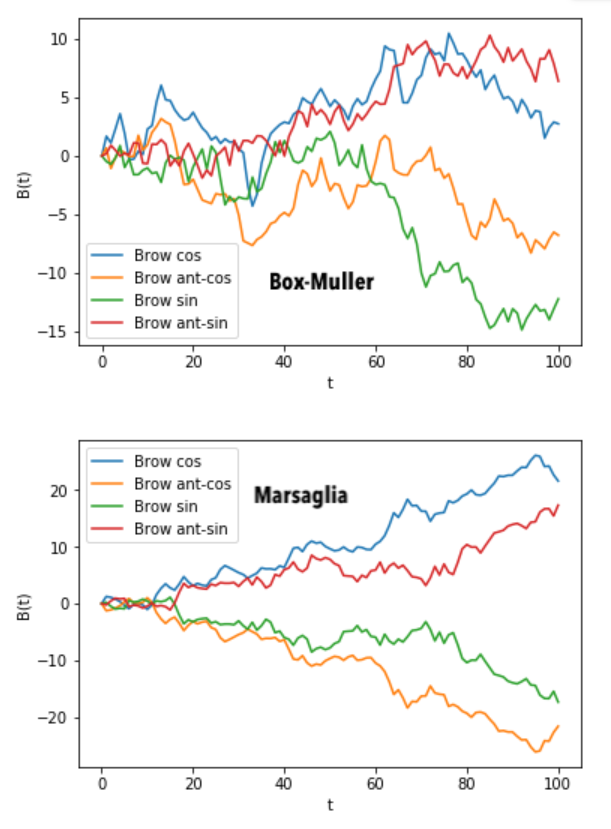

4. Representar graficamente 1 movimiento browniano bidimensional.

In [ ]:
def mov_browniano_bidim(seed, a, b, m, T, dt):
    """
    Genera un movimiento browniano bidimensional.
    Devuelve:
        X, Y: Coordenadas del movimiento browniano bidimensional.
    """
    n_normales = T * 2  # Necesitamos dos normales por paso (para X e Y)

    # Generar valores normales independientes para X e Y
    Z_x, Z_y = box_muller(seed, a, b, m, n_normales)

    # Inicializar posiciones
    X = [0]
    Y = [0]

    for i in range(pasos):
        # Actualizar posiciones en X e Y
        X.append(X[-1] + np.sqrt(dt) * Z_x[i])
        Y.append(Y[-1] + np.sqrt(dt) * Z_y[i])

    return np.array(X), np.array(Y)

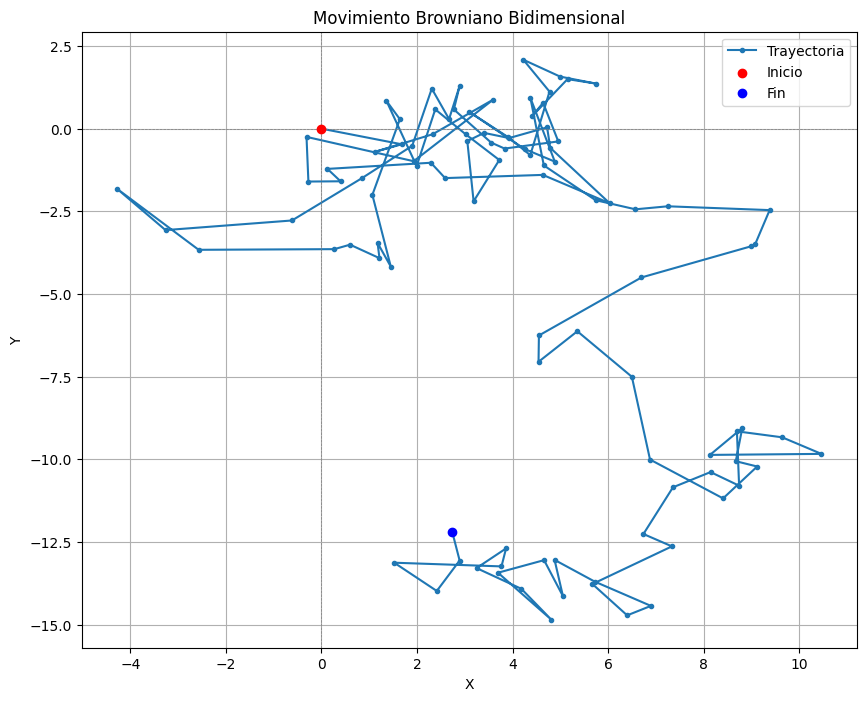

In [ ]:
T = 100  # Tiempo total
dt = 1   # Incremento de tiempo

# Generar el movimiento browniano bidimensional
X, Y = mov_browniano_bidim(seed, a, b, m, T, dt)

# Visualización
plt.figure(figsize=(10, 8))
plt.plot(X, Y, marker='o', markersize=3, label="Trayectoria")
plt.scatter(X[0], Y[0], color='red', label="Inicio", zorder=5)
plt.scatter(X[-1], Y[-1], color='blue', label="Fin", zorder=5)
plt.title("Movimiento Browniano Bidimensional")
plt.xlabel("X")
plt.ylabel("Y")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid()
plt.legend()
plt.show()

<font size="6"><center><span style="color:blue">***Práctica 2***</span></center></font>

<font size="4" color=blue>**Apartado a**</font>
***

Obtener los valores de una opción call y una opción put europeas con vencimiento $T$. Dar la estimación del valor y la precisión si:  

$$
V_{\mathrm{call}} = e^{-r_c t} \mathbb{E}_{\mathrm{riesgo~neutro}} [\textrm{payoff}] = (1+r)^{-t} \mathbb{E}_{\mathrm{riesgo~neutro}}[\textrm{payoff}].
$$

- **(a.1.)** Obtener el valor de una opción call usando la fórmula de Black-Scholes:  

$$
V_{\mathrm{call}}(S,t) = Se^{-d_c t} \Phi(d_1) - Ke^{-r_c t} \Phi(d_2),
$$

donde:
$$
d_1 = \frac{\ln(S/K) + (r_c -d_c + 0.5 \sigma^2)t}{\sigma \sqrt{t}}, \quad d_2 = d_1 -\sigma\sqrt{t}.
$$

**Datos:**
- $r = 0.03$
- Strike = $14$
- Plazo $T = 1,2,3$
- $\sigma = 0.3$
- $S_0 = 14$
- $d = 0$

<font size="2">**Nota:** La varianza de la estimación del valor es $S^2_{\mathrm{call}} = (e^{-r_c t})^2 S^2_{\mathrm{\overline{payoff}}}$.
    
<font size="2" color=grey>**Nota para comprobación:** $t=1; V_{\mathrm{call}}=1.856787;V_{\mathrm{put}}=1.449020$.</font>



In [ ]:
# Datos
r = 0.03  # Tasa libre de riesgo
K = 14  # Strike price
T_values = [1, 2, 3]  # Tiempos al vencimiento
sigma = 0.3  # Volatilidad
S0 = 14  # Precio inicial del subyacente
d = 0  # Tasa de dividendos

rc=math.log(1+r) # tasa de interés en tiempo continuo
dc=math.log(1+d)

In [ ]:
# Fórmula de Black-Scholes para call
def black_scholes_call(S, K, r, sigma, d, T):
    d1 = (math.log(S / K) + (math.log(1+r) - math.log(1+d) + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    precio_call = S * math.exp(-math.log(1+d) * T) * norm.cdf(d1) - K * math.exp(-math.log(1+r) * T) * norm.cdf(d2)
    return precio_call

# Cálculo de precios de la call para cada T
precios_call = {T: black_scholes_call(S0, K, r, sigma, d, T) for T in T_values}
precios_call

{1: 1.8567867063017554, 2: 2.708070154007963, 3: 3.3810720081993244}

In [ ]:
# Fórmula de Black-Scholes para put
def black_scholes_put(S, K, r, sigma, d, T):
    d1 = (math.log(S / K) + (math.log(1+r) - math.log(1+d) + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    put_price = - S * math.exp(-math.log(1+d) * T) * norm.cdf(-d1) + K * math.exp(-math.log(1+r) * T) * norm.cdf(-d2)
    return put_price

# Cálculo de precios de la put para cada T
precios_put = {T: black_scholes_put(S0, K, r, sigma, d, T) for T in T_values}
precios_put

{1: 1.4490197160104952, 2: 1.9044128818805266, 3: 2.1930552391435576}

<font size="4" color=blue>**Apartado b**</font>
***
Obtener los valores de una opción call y una opción put europeas con vencimiento $T = 1$ (con los mismos datos del apartado anterior). Dar la estimación del valor y la precisión si:  

$$
V_{\mathrm{call}} = e^{-r_c t} \mathbb{E}_{\mathrm{riesgo~neutro}}[\textrm{payoff}] = (1+r)^{-t} \mathbb{E}_{\mathrm{riesgo~neutro}}[\textrm{payoff}].
$$

- **(b.1.)** Obtener el valor final del subyacente mediante la expresión en el plazo final:  

$$
S(t) = S(0) e^{(r_c - d_c - 0.5\sigma^2)t + \sigma \sqrt{t}\mathcal{N}(0,1)}.
$$


In [ ]:
# Parámetros para las simulaciones
N=1000 # nº de simulaciones
alpha=0.05 # nivel de significancia

In [ ]:
# Simulamos para T = 1, 2, 3
resultados = {}
for T in [1, 2, 3]:
    # Simular precios finales del subyacente S(T)
    Z = box_muller(seed, a, b, m, N)[1]

    # Simular precios finales del subyacente S(T)
    ST = S0 * np.exp((rc - d - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

    # Calcular payoffs
    payoff_call = np.maximum(ST - K, 0)
    payoff_put = np.maximum(K - ST, 0)

    # Calcular la media de los payoffs simulados
    media_call = np.mean(payoff_call)
    media_put = np.mean(payoff_put)

    # Traer el valor al presente
    V_call = np.exp(-rc * T) * media_call
    V_put = np.exp(-rc * T) * media_put

    # Calcular varianza de los payoffs
    varianza_payoff_call = np.var(payoff_call, ddof=1)
    varianza_payoff_put = np.var(payoff_put, ddof=1)

    # Ajustar varianza según el descuento temporal
    varianza_V_call = varianza_payoff_call * np.exp(-2 * rc * T)
    varianza_V_put = varianza_payoff_put * np.exp(-2 * rc * T)

    # Calcular precisión
    precision_call = t.ppf(1 - alpha / 2, df=N - 1) * np.exp(-rc * T) * np.sqrt(varianza_payoff_call / N)
    precision_put = t.ppf(1 - alpha / 2, df=N - 1) * np.exp(-rc * T) * np.sqrt(varianza_payoff_put / N)

    # Guardamos los resultados
    resultados[T] = {
        "V_call": V_call,
        "varianza_V_call": varianza_V_call,
        "precision_call": precision_call,
        "V_put": V_put,
        "varianza_V_put": varianza_V_put,
        "precision_put": precision_put
    }

# Mostramos los resultados
for T, res in resultados.items():
    print(f"\nResultados para T={T}:")
    print(f"El valor estimado de la opción Call es: {res['V_call']}")
    print(f"La varianza de V_call es: {res['varianza_V_call']}")
    print(f"La precisión (intervalo de confianza) para la opción Call es: {res['precision_call']}")
    print(f"El valor estimado de la opción Put es: {res['V_put']}")
    print(f"La varianza de V_put es: {res['varianza_V_put']}")
    print(f"La precisión (intervalo de confianza) para la opción Put es: {res['precision_put']}")


Resultados para T=1:
El valor estimado de la opción Call es: 1.9198411478114454
La varianza de V_call es: 10.065817939619663
La precisión (intervalo de confianza) para la opción Call es: 0.19687887334678045
El valor estimado de la opción Put es: 1.41474343792752
La varianza de V_put es: 3.6154159702542747
La precisión (intervalo de confianza) para la opción Put es: 0.11799231334309523

Resultados para T=2:
El valor estimado de la opción Call es: 2.807325041897552
La varianza de V_call es: 24.2046750814177
La precisión (intervalo de confianza) para la opción Call es: 0.3052981751874492
El valor estimado de la opción Put es: 1.8593602509323894
La varianza de V_put es: 5.830417434088093
La precisión (intervalo de confianza) para la opción Put es: 0.14983884085008692

Resultados para T=3:
El valor estimado de la opción Call es: 3.5132815156740897
La varianza de V_call es: 41.67894593033163
La precisión (intervalo de confianza) para la opción Call es: 0.40062029222900064
El valor estimado 

<font size="2" color=grey>**Nota para comprobación:** $t=1; V_{\mathrm{call}}=1.919841;Varianza=10.065818;Precisión=0.196879$.</font>

- **(b.2.)** Obtener el valor final del subyacente mediante simulación dinámica con $\Delta t = 1/12$ y la expresión (Lema de Itô):  

$$
S \leftarrow S e^{(r_c - d_c - 0.5\sigma^2)\Delta t + \sigma \sqrt{\Delta t}\mathcal{N}(0,1)}.
$$

In [ ]:
# Simulamos para T = 1, 2, 3
resultados = {}
for T in [1, 2, 3]:
    delta = 1 / 12  # Tamaño del paso temporal (meses)
    pasos = int(T / delta)  # Número de pasos en el tiempo

    # Generar números normales para los pasos
    Z = box_muller(seed, a, b, m, pasos*N)[1]  # Generar números normales
    Z = Z.reshape(N, pasos)  # Redimensionar a una matriz (N, pasos)

    # Inicializar matriz para precios: filas = trayectorias, columnas = pasos
    precios_simulados = np.zeros((N, pasos + 1))
    precios_simulados[:, 0] = S0  # El primer paso es el precio inicial para las N simulaciones

    # Simulación paso a paso de la ecuación del Lema de Itô
    for t in range(1, pasos + 1):
        precios_simulados[:, t] = precios_simulados[:, t - 1] * np.exp(
            (rc - d - 0.5 * sigma**2) * delta + sigma * np.sqrt(delta) * Z[:, t - 1]
        )

    # Nos quedamos con el último paso temporal para todas las trayectorias simuladas
    ST_final = precios_simulados[:, -1]

    # Calcular payoffs
    payoff_call_sim = np.maximum(ST_final - K, 0)
    payoff_put_sim = np.maximum(K - ST_final, 0)

    # Calcular la media de los payoffs
    media_call_sim = np.mean(payoff_call_sim)
    media_put_sim = np.mean(payoff_put_sim)

    # Traer el valor al presente
    V_call = np.exp(-rc * T) * media_call_sim
    V_put = np.exp(-rc * T) * media_put_sim

    # Calcular varianza de los payoffs
    varianza_payoff_call_sim = np.var(payoff_call_sim, ddof=1)
    varianza_payoff_put_sim = np.var(payoff_put_sim, ddof=1)

    # Calcular varianzas de los valores de las opciones
    varianza_V_call_sim = varianza_payoff_call_sim * np.exp(-2 * rc * T)
    varianza_V_put_sim = varianza_payoff_put_sim * np.exp(-2 * rc * T)

    from scipy.stats import t
    # Calcular precisión
    precision_call_sim = t.ppf(1 - alpha / 2, df=N - 1) * np.exp(-rc * T) * np.sqrt(varianza_payoff_call_sim / N)
    precision_put_sim = t.ppf(1 - alpha / 2, df=N - 1) * np.exp(-rc * T) * np.sqrt(varianza_payoff_put_sim / N)

    # Guardamos los resultados
    resultados[T] = {
        "V_call": V_call,
        "varianza_V_call": varianza_V_call_sim,
        "precision_call": precision_call_sim,
        "V_put": V_put,
        "varianza_V_put": varianza_V_put_sim,
        "precision_put": precision_put_sim
    }

# Mostramos los resultados
for T, res in resultados.items():
    print(f"\nResultados para T={T}:")
    print(f"El valor estimado de la opción Call es: {res['V_call']}")
    print(f"La varianza de V_call es: {res['varianza_V_call']}")
    print(f"La precisión (intervalo de confianza) para la opción Call es: {res['precision_call']}")
    print(f"El valor estimado de la opción Put es: {res['V_put']}")
    print(f"La varianza de V_put es: {res['varianza_V_put']}")
    print(f"La precisión (intervalo de confianza) para la opción Put es: {res['precision_put']}")


Resultados para T=1:
El valor estimado de la opción Call es: 2.0088485591073413
La varianza de V_call es: 10.349455001378766
La precisión (intervalo de confianza) para la opción Call es: 0.19963345369047392
El valor estimado de la opción Put es: 1.388020727823363
La varianza de V_put es: 3.5211924214513015
La precisión (intervalo de confianza) para la opción Put es: 0.11644462835593307

Resultados para T=2:
El valor estimado de la opción Call es: 2.820939002124221
La varianza de V_call es: 26.995577478179406
La precisión (intervalo de confianza) para la opción Call es: 0.32241919622742643
El valor estimado de la opción Put es: 1.85225132669037
La varianza de V_put es: 5.730004128823458
La precisión (intervalo de confianza) para la opción Put es: 0.1485429509501713

Resultados para T=3:
El valor estimado de la opción Call es: 3.5126724900158695
La varianza de V_call es: 47.95923338954023
La precisión (intervalo de confianza) para la opción Call es: 0.42974486509125087
El valor estimado

<font size="2" color=grey>**Nota para comprobación:** $t=1; V_{\mathrm{call}}=2.008849;Varianza=10.349455;Precisión=0.199633$.</font>

- **(b.3.)** Obtener el valor final del subyacente mediante simulación dinámica con $\Delta t = 1/12$ y el mecanismo de transición. (Ecuación estocástica)  

$$
S \leftarrow S + S(r_{\Delta t} - d_{\Delta t})+\sigma S \sqrt{\Delta t}\mathcal{N}(0,1) = S(1+r-d)^{\Delta t} + \sigma S \sqrt{\Delta t} \mathcal{N}(0,1)
$$

In [ ]:
# Simulamos para T = 1, 2, 3
resultados = {}
for T in [1, 2, 3]:
    delta = 1 / 12  # Tamaño del paso temporal (meses)
    pasos = int(T / delta)  # Número de pasos en el tiempo

    # Generar números normales para los pasos
    Z = box_muller(seed, a, b, m, pasos * N)[1]  # Generar números normales
    Z1 = Z.reshape(N, pasos)  # Redimensionar a una matriz (N, pasos)

    # Inicializamos matriz para precios: filas = trayectorias, columnas = pasos
    precios_simulados = np.zeros((N, pasos + 1))
    precios_simulados[:, 0] = S0  # El primer paso es el precio inicial para las N simulaciones

    # Simulación paso a paso utilizando la ecuación estocástica
    for t in range(1, pasos + 1):
        precios_simulados[:, t] = precios_simulados[:, t - 1] * (1+r-d)**delta + sigma * precios_simulados[:, t - 1] * np.sqrt(delta) * Z1[:, t - 1]

    # Nos quedamos con el último paso temporal para todas las trayectorias simuladas
    ST_final = precios_simulados[:, -1]

    # Calculamos los payoffs de las opciones
    payoff_call = np.maximum(ST_final - K, 0)
    payoff_put = np.maximum(K - ST_final, 0)

    # Calculamos la media de los payoffs
    media_call = np.mean(payoff_call)
    media_put = np.mean(payoff_put)

    # Traemos el valor al presente
    V_call = np.exp(-rc * T) * media_call
    V_put = np.exp(-rc * T) * media_put

    # Calculamos varianza de los payoffs
    varianza_payoff_call = np.var(payoff_call, ddof=1)
    varianza_payoff_put = np.var(payoff_put, ddof=1)

    # Calculamos varianzas de los valores de las opciones
    varianza_V_call = varianza_payoff_call * np.exp(-2 * rc * T)
    varianza_V_put = varianza_payoff_put * np.exp(-2 * rc * T)

    from scipy.stats import t
    # Calculamos la precisión
    precision_call = t.ppf(1 - alpha / 2, df=N - 1) * np.exp(-rc * T) * np.sqrt(varianza_payoff_call / N)
    precision_put = t.ppf(1 - alpha / 2, df=N - 1) * np.exp(-rc * T) * np.sqrt(varianza_payoff_put / N)

    # Guardamos los resultados
    resultados[T] = {
        "V_call": V_call,
        "varianza_V_call": varianza_V_call,
        "precision_call": precision_call,
        "V_put": V_put,
        "varianza_V_put": varianza_V_put,
        "precision_put": precision_put
    }

# Mostramos los resultados
for T, res in resultados.items():
    print(f"\nResultados para T={T}:")
    print(f"El valor estimado de la opción Call es: {res['V_call']}")
    print(f"La varianza de V_call es: {res['varianza_V_call']}")
    print(f"La precisión (intervalo de confianza) para la opción Call es: {res['precision_call']}")
    print(f"El valor estimado de la opción Put es: {res['V_put']}")
    print(f"La varianza de V_put es: {res['varianza_V_put']}")
    print(f"La precisión (intervalo de confianza) para la opción Put es: {res['precision_put']}")


Resultados para T=1:
El valor estimado de la opción Call es: 2.005745342648669
La varianza de V_call es: 10.020386095271691
La precisión (intervalo de confianza) para la opción Call es: 0.19643406667514124
El valor estimado de la opción Put es: 1.3929578499265542
La varianza de V_put es: 3.6160896382270713
La precisión (intervalo de confianza) para la opción Put es: 0.11800330570756448

Resultados para T=2:
El valor estimado de la opción Call es: 2.8218792434570137
La varianza de V_call es: 26.324605283540954
La precisión (intervalo de confianza) para la opción Call es: 0.31838713714221467
El valor estimado de la opción Put es: 1.8593595952573023
La varianza de V_put es: 5.803167294789175
La precisión (intervalo de confianza) para la opción Put es: 0.14948827320767624

Resultados para T=3:
El valor estimado de la opción Call es: 3.5293721018335744
La varianza de V_call es: 46.426738731009216
La precisión (intervalo de confianza) para la opción Call es: 0.42282306363973104
El valor est

<font size="2" color=grey>**Nota para comprobación:** $t=1; V_{\mathrm{call}}=2.005745;Varianza=10.020386;Precisión=0.196434$.</font>

- **(b.4.)** Usando el valor final del subyacente mediante la expresión en el plazo final, determinar el tamaño muestral para que la estimación sea de un céntimo de Euro.

<font size="2" color=grey>**Nota para comprobación:** $t=1;n \geq 300mil$.</font>

In [ ]:
def simulaciones_minimas( alpha=0.05, tipo='call', tolerancia=0.01, n=30, N=800000, x0=12345):
    # Inicializamos la precisión como infinito para forzar la primera iteración
    precision = float('Inf')

    # Contador de simulaciones
    iter = 0

    # Inicializamos la media del payoff
    media_payoff = 0

    # Estimar la varianza de forma recursiva
    var_est = 0

    # Iteramos mientras no cumplamos con el número mínimo de simulaciones o la precisión requerida
    while (iter < n) or (precision > tolerancia and iter < N):

        # generamos valores normales con boxmuller seno
        z1, z2, x0 = BoxMuller(x0)  # Actualizamos la semilla para la siguiente iteración

        # Escoge uno de los valores generados (puedes alternar entre z1 y z2 si prefieres)
        Z = z1 if iter % 2 == 0 else z2

        # Valor del subyacente
        S = S0 * np.exp((rc - dc - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

        # Payoff de la opción según si es call o put
        if tipo == 'call':
            payoff = max(S - K, 0)
        elif tipo == 'put':
            payoff = max(K - S, 0)
        else:
            raise ValueError("Error: diga si la opción es de tipo 'call' o 'put'.")

        valor_presente_payoff = np.exp(-rc * T) * payoff
        iter += 1

        if iter == 1:
            media_payoff = valor_presente_payoff
            var_est = 0
        else:
            # Actualizar la media
            media_payoff_antigua = media_payoff
            media_payoff = 1 / iter * ((iter - 1) * media_payoff_antigua + valor_presente_payoff)

            # Actualizar la varianza estimada
            var_est += (valor_presente_payoff - media_payoff_antigua) * (valor_presente_payoff - media_payoff)

            # Varianza muestral
            var_S2 = var_est / (iter - 1)

            # Precisión
            precision = t.ppf(1 - (alpha / 2), iter - 1) * np.sqrt(var_S2 / iter)

    return iter

In [ ]:
simulaciones_call = simulaciones_minimas(alpha,'call', 0.01, 30, 800000)
simulaciones_put = simulaciones_minimas(alpha,'put', 0.01, 30, 800000)

print(f"El número mínimo de simulaciones para la opción 'call' es: {simulaciones_call}")
print(f"El número mínimo de simulaciones para la opción 'put' es: {simulaciones_put}")

El número mínimo de simulaciones para la opción 'call' es: 800000
El número mínimo de simulaciones para la opción 'put' es: 284205


<font size="6"><center><span style="color:blue">***Práctica 3***</span></center></font>

Obtener mediante simulación el valor de una opción call europea vainilla con dividendos para plazos t=1,2,...,T, pero cuyos incrementos se rigen según una distribución t-Student. Dar la estimación del valor y la precisión y comparar con el resultado de la práctica anterior. Utilizar los mismos datos que en la práctica anterior y n=6. Utilizar para la evolución del subyacente:

$$
S \leftarrow S e^{(r_c - d_c)\Delta t} + \sigma S \sqrt{\Delta t}\frac{t_n}{\sqrt{n/(n-2)}}
$$

<font size="2">**Nota:** Recordar que la varianza de una t-Student con n grados de libertad es $\frac{n}{n-2}$, con lo que al sustituir la Normal por la t-Student, ha de hacerse con ésta tipificada.
    
<font size="2" color=grey>**Nota para comprobación:** $t=1; V_{\mathrm{call}}=1.840173;Varianza=8.169188;Precisión=0.177363$.</font>

Hemos corregido los apartados de la práctica 2 para generarlos para T=2,3, ya que algunos sólo se habian hecho para T=1. Como habiamos indicado sólo era necesario realizar un bucle for para los distintos valores de T.

In [ ]:
# Generamos números aleatorios t-Student con 6 grados de libertad
def generar_t_student(n, df, seed):
    x = np.zeros(n)
    x0 = seed
    for i in range(n):
        x[i], x0 = t_Student(df, x0)
    return x, x0

# Simulamos para T = 1, 2, 3
resultados = {}
for T in [1, 2, 3]:
    delta = 1/12  # Tamaño del paso temporal
    pasos = int(T / delta)  # Número de pasos

    tst, _ = generar_t_student(pasos * N, 6, 123456789)
    tst = tst.reshape(N, pasos)  # Redimensionamos la matriz

    # Inicializamos matriz para precios
    precios_simulados = np.zeros((N, pasos + 1))
    precios_simulados[:, 0] = S0  # El primer paso es el precio inicial para las N simulaciones

    # Simulación paso a paso utilizando la ecuación estocástica
    for t in range(1, pasos + 1):
        precios_simulados[:, t] = precios_simulados[:, t - 1] * np.exp((rc - dc) * delta) + \
                                  sigma * precios_simulados[:, t - 1] * np.sqrt(delta) * \
                                  (tst[:, t - 1] / np.sqrt(6 / 4))

    # Nos quedamos con el último paso temporal para todas las trayectorias simuladas
    ST_final = precios_simulados[:, -1]

    # Calculamos los payoffs de las opciones
    payoff_call = np.maximum(ST_final - K, 0)
    payoff_put = np.maximum(K - ST_final, 0)

    # Calculamos la media de los payoffs
    media_call = np.mean(payoff_call)
    media_put = np.mean(payoff_put)

    # Traemos el valor al presente
    V_call = np.exp(-rc * T) * media_call
    V_put = np.exp(-rc * T) * media_put

    # Calculamos varianza de los payoffs
    varianza_payoff_call = np.var(payoff_call, ddof=1)
    varianza_payoff_put = np.var(payoff_put, ddof=1)

    # Calculamos varianzas de los valores de las opciones
    varianza_V_call = varianza_payoff_call * np.exp(-2 * rc * T)
    varianza_V_put = varianza_payoff_put * np.exp(-2 * rc * T)

    # Calculamos la precisión
    from scipy.stats import t
    precision_call = t.ppf(1 - alpha / 2, df=N - 1) * np.exp(-rc * T) * np.sqrt(varianza_payoff_call / N)
    precision_put = t.ppf(1 - alpha / 2, df=N - 1) * np.exp(-rc * T) * np.sqrt(varianza_payoff_put / N)

    # Guardamos los resultados
    resultados[T] = {
        "V_call": V_call,
        "varianza_V_call": varianza_V_call,
        "precision_call": precision_call,
        "V_put": V_put,
        "varianza_V_put": varianza_V_put,
        "precision_put": precision_put
    }

# Mostramos los resultados
for T, res in resultados.items():
    print(f"\nResultados para T={T}:")
    print(f"El valor estimado de la opción Call es: {res['V_call']}")
    print(f"La varianza de V_call es: {res['varianza_V_call']}")
    print(f"La precisión (intervalo de confianza) para la opción Call es: {res['precision_call']}")
    print(f"El valor estimado de la opción Put es: {res['V_put']}")
    print(f"La varianza de V_put es: {res['varianza_V_put']}")
    print(f"La precisión (intervalo de confianza) para la opción Put es: {res['precision_put']}")


Resultados para T=1:
El valor estimado de la opción Call es: 1.8401726463978136
La varianza de V_call es: 8.169187918920503
La precisión (intervalo de confianza) para la opción Call es: 0.17736340719986526
El valor estimado de la opción Put es: 1.3984840256176085
La varianza de V_put es: 3.7034954196390224
La precisión (intervalo de confianza) para la opción Put es: 0.1194209401376614

Resultados para T=2:
El valor estimado de la opción Call es: 2.664038977921061
La varianza de V_call es: 20.821542515398004
La precisión (intervalo de confianza) para la opción Call es: 0.2831594303278022
El valor estimado de la opción Put es: 1.8019782478304556
La varianza de V_put es: 5.90532247528197
La precisión (intervalo de confianza) para la opción Put es: 0.15079828036884801

Resultados para T=3:
El valor estimado de la opción Call es: 3.46394513214825
La varianza de V_call es: 38.33675476041106
La precisión (intervalo de confianza) para la opción Call es: 0.38422202205219574
El valor estimado d

Hagamos tablas comparativas de los distintos apartados:

In [ ]:
# Comparación del valor teórico de Black-Scoles (Práctica 2 - apartado a) y la práctica 3:

import pandas as pd

# Datos de la tabla
data = {
    "Plazo (T)": [1, 1, 2, 2, 3, 3],
    "Modelo": ["Black-Scholes", "t-Student", "Black-Scholes", "t-Student", "Black-Scholes", "t-Student"],
    "Call (Valor Estimado)": [1.8568, 1.8402, 2.7081, 2.6640, 3.3811, 3.4639],
    "Put (Valor Estimado)": [1.4490, 1.3985, 1.9044, 1.8020, 2.1931, 2.1185]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Mostrar la tabla
print(df)


   Plazo (T)         Modelo  Call (Valor Estimado)  Put (Valor Estimado)
0          1  Black-Scholes                 1.8568                1.4490
1          1      t-Student                 1.8402                1.3985
2          2  Black-Scholes                 2.7081                1.9044
3          2      t-Student                 2.6640                1.8020
4          3  Black-Scholes                 3.3811                2.1931
5          3      t-Student                 3.4639                2.1185


La fórmula de Black-Scholes representa el valor exacto de una opción en un marco teórico, asumiendo hipótesis estrictas como volatilidad constante, distribución lognormal de los precios del subyacente, y ausencia de costos de transacción o restricciones al arbitraje. Las simulaciones generan fluctuaciones en cada ejecución debido al término aleatorio.
El último modelo, basado en t-Student, sigue de cerca a Black-Scholes para T=1, pero las diferencias aumentan ligeramente para T=2 y más significativamente para T=3.
Esto refleja cómo las hipótesis de Black-Scholes comienzan a divergir de las condiciones simuladas, especialmente para horizontes temporales más largos.

In [ ]:
# Comaparación del apartado b1,b2,b3 de la práctica 2 y práctica 3

import pandas as pd

# Datos de la tabla
data = {
    "Plazo (T)": [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3],
    "Modelo": [
        "Plazo final", "Lema de Itô", "Ecuación Estocástica", "t-Student",
        "Plazo final", "Lema de Itô", "Ecuación Estocástica", "t-Student",
        "Plazo final", "Lema de Itô", "Ecuación Estocástica", "t-Student"],
    "Call (Valor Estimado)": [
        1.9198, 2.0088, 2.0057, 1.8402,
        2.80732, 2.8209, 2.8219, 2.6640,
        3.5132, 3.5127, 3.5294, 3.4639],
    "Put (Valor Estimado)": [
        1.4147, 1.3880, 1.3930, 1.3985,
        1.8593, 1.8523, 1.8594, 1.8020,
        2.1412, 2.1630, 2.1790, 2.1185]
}

# Crear el DataFrame
df = pd.DataFrame(data)
pd.set_option('display.width', 1000)  # Ajusta el ancho total
pd.set_option('display.max_colwidth', None)  # Deshabilita truncar las columnas
# Mostrar la tabla
print(df)

    Plazo (T)                Modelo  Call (Valor Estimado)  Put (Valor Estimado)
0           1           Plazo final                1.91980                1.4147
1           1           Lema de Itô                2.00880                1.3880
2           1  Ecuación Estocástica                2.00570                1.3930
3           1             t-Student                1.84020                1.3985
4           2           Plazo final                2.80732                1.8593
5           2           Lema de Itô                2.82090                1.8523
6           2  Ecuación Estocástica                2.82190                1.8594
7           2             t-Student                2.66400                1.8020
8           3           Plazo final                3.51320                2.1412
9           3           Lema de Itô                3.51270                2.1630
10          3  Ecuación Estocástica                3.52940                2.1790
11          3             t-

Para todos los valores de T simulados (1,2,3), el último método que utiliza la distribución $t_n$, tiene colas más pesadas que la normal estándar. Esto significa que reduce la probabilidad de eventos extremos, limitando la dispersión de los precios y generando valores más conservadores para las opciones. Este enfoque es útil en situaciones financieras donde se quiere reducir el riesgo de fluctuaciones grandes en los precios. Además, la menor varianza en este método significa menos incertidumbre y una estimación más estable de los valores futuros, lo que es beneficioso para los inversores que prefieren menos volatilidad. La mayor precisión del cálculo (gracias a un intervalo de confianza más estrecho) también permite tomar decisiones más informadas y confiables.

Por otro lado, los otros métodos generan valores más altos debido a la mayor variabilidad en los precios simulados, pero con una mayor varianza y menor precisión, lo que implica más incertidumbre para los inversores. En particular, el modelo browniano permite una mayor variabilidad en las trayectorias de los precios, lo que a su vez aumenta el valor de la opción.

<font size="6"><center><span style="color:blue">***Práctica 4***</span></center></font>

<font size="4" color=blue>**Apartado a**</font>
***
Se trata de ver la influencia que tienen los parámetros en el valor de la opción, de acuerdo a la fórmula de Black-Scholes, de una forma intuitiva basada en revisar el cambio del valor de la opción cuando cambian los parámetros a través de una rejilla de valores. En la mayoría de los casos, se puede ver una cuantificación más exacta de forma analítica utilizando la derivada parcial del valor de la opción con respecto a la variable que estamos examinando.

Teniendo en cuenta la fórmula de Black-Scholes para valoración de opciones:  

$$
V_{\mathrm{call}}(S,t) = Se^{-d_c t} \Phi(d_1) - Ke^{-r_c t} \Phi(d_2),
$$

donde:
$$
d_1 = \frac{\ln(S/K) + (r_c -d_c + 0.5 \sigma^2)t}{\sigma \sqrt{t}}, \quad d_2 = d_1 -\sigma\sqrt{t}.
$$
***
**Recordatorio datos utilizados anteriormente:**
- $r = 0.03$
- Strike = $14$
- Plazo $T = 1,2,3$
- $\sigma = 0.3$
- $S_0 = 14$
- $d = 0$
    
<font size="2" color=grey>**Nota para comprobación:** $t=1; V_{\mathrm{call}}=1.856787;V_{\mathrm{put}}=1.449020$.</font>
***
Se trata de realizar una tabla en la que por filas se realicen modificaciones del valor del strike $K$, por ejemplo para valores 12, 13, 14, 15, 16 y por columnas de la tasa de interés $r$, por ejemplo valores 0.01, 0.02, 0.03, 0.04, 0.05 y el contenido de la celda se corresponda con el valor de la opción. Mostrar 2 tablas, la primera para T=0.5 y la segunda para T=1. Ejemplo de estilo de tabla:

<center><strong>Valores de distintas opciones de compra Call</strong></center>
   
|   |   |   | **r** |    |   |
|--------------|--------------|--------------|--------------|--------------|--------------|
| **k**    | **0.01**    | **0.02**    | **0.03**    | **0.04**    | **0.05**    |
| **12**    | ......    | ......    | ......    | ......    | ......    |
| **13**    | ......    | ......    | ......    | ......    | ......    |
| **14**    | ......    | ......    |1.856787| ......    | ......    |
| **15**    | ......    | ......    | ......    | ......    | ......    |
| **16**    | ......    | ......    | ......    | ......    | ......    |




Se pide analizar y comentar los siguientes casos:

- **(a.1.) Modificaciones en el tiempo T hasta la fecha de ejercicio.**
- **(a.2.) Modificaciones en la tasa de interés r.**
- **(a.3.) Modificaciones en el precio de ejercicio K.**

Añadir las tablas que consideréis para poder analizar:

- **(a.4.) Cambios en la volatilidad $\sigma$.**



In [ ]:
# Datos
r = 0.03  # Tasa libre de riesgo
K = 14  # Strike price
T_values = [1, 2, 3]  # Tiempos al vencimiento
sigma = 0.3  # Volatilidad
S0 = 14  # Precio inicial del subyacente
d = 0  # Tasa de dividendos

rc=math.log(1+r) # tasa de interés en tiempo continuo
dc=math.log(1+d)

# Tablas de la call para T=0.5 y T=1:

In [ ]:
strike_values = [12, 13, 14, 15, 16]  # Valores del strike
interest_rates = [0.01, 0.02, 0.03, 0.04, 0.05]  # Tasas de interés
tiempos = [0.5, 1]  # Plazos

# Crear tablas para los plazos T=0.5 y T=1
tables = {}
for T in tiempos:
    table = []
    for K in strike_values:
        row = [black_scholes_call(S0, K, r, sigma, d, T) for r in interest_rates]
        table.append(row)
    tables[T] = pd.DataFrame(table, columns=[f"r={r:.2f}" for r in interest_rates], index=[f"K={K}" for K in strike_values])

# Mostrar las tablas generadas
for T, table in tables.items():
    print(f"\nTabla para T={T}")
    print(table)


Tabla para T=0.5
        r=0.01    r=0.02    r=0.03    r=0.04    r=0.05
K=12  2.418062  2.461715  2.505158  2.548382  2.591382
K=13  1.747686  1.786437  1.825176  1.863891  1.902572
K=14  1.214709  1.246999  1.279438  1.312015  1.344717
K=15  0.813874  0.839249  0.864872  0.890734  0.916824
K=16  0.527375  0.546293  0.565496  0.584977  0.604730

Tabla para T=1
        r=0.01    r=0.02    r=0.03    r=0.04    r=0.05
K=12  2.825326  2.902243  2.979025  3.055629  3.132018
K=13  2.228325  2.298773  2.369444  2.440294  2.511277
K=14  1.731245  1.793757  1.856787  1.920289  1.984221
K=15  1.327261  1.381214  1.435891  1.491254  1.547265
K=16  1.005796  1.051255  1.097558  1.144674  1.192575


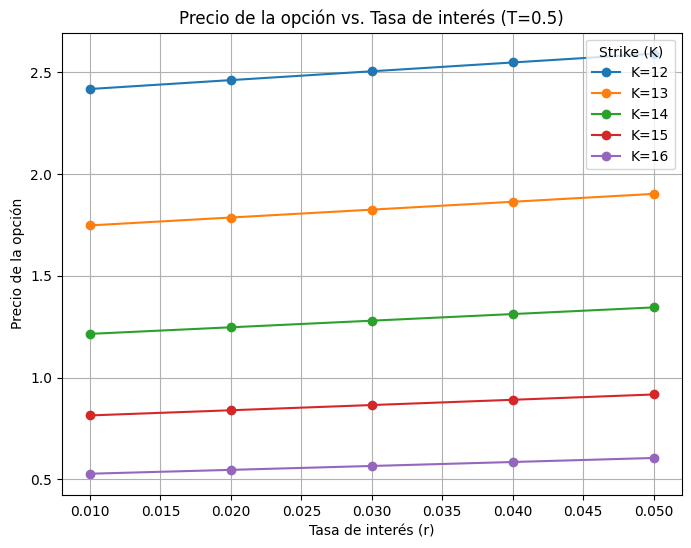

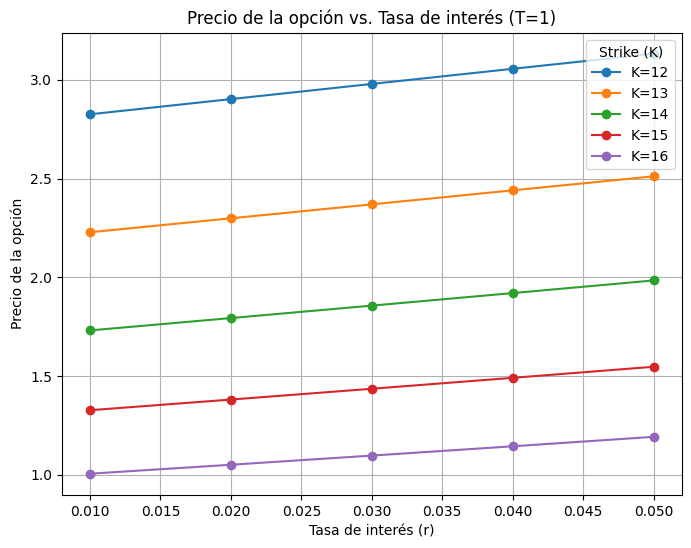

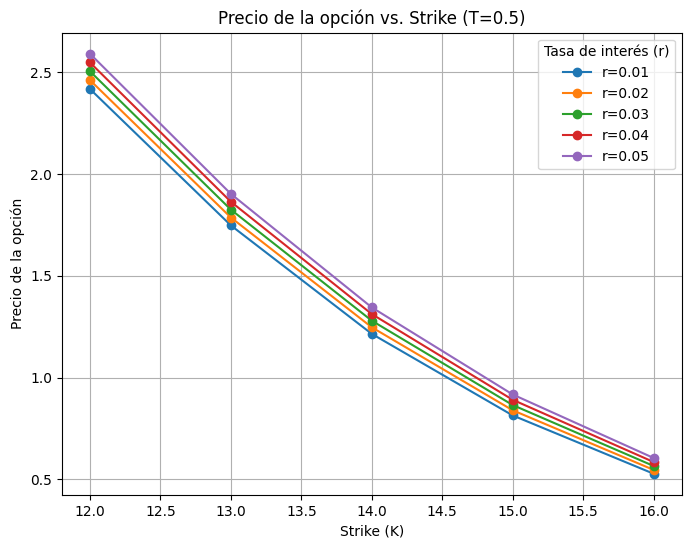

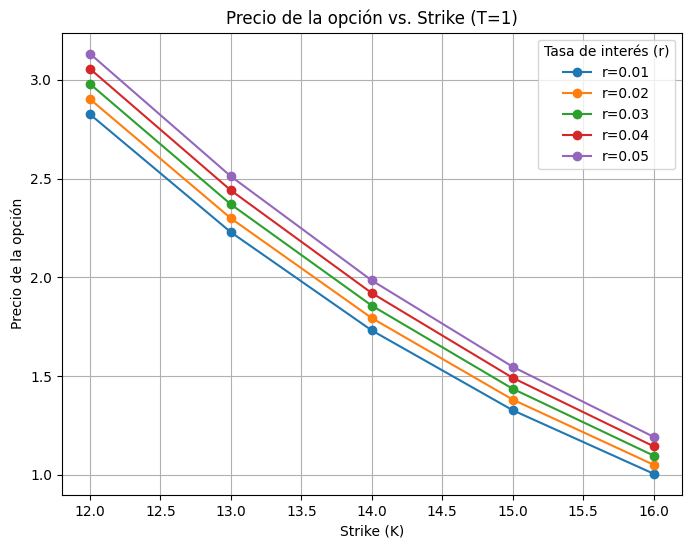

In [ ]:
# Graficar: Precio de la opción vs. r para cada T y K (mantenemos K cte)
for T, table in tables.items():
    plt.figure(figsize=(8, 6))
    for idx, row in table.iterrows():
        plt.plot(interest_rates, row, marker='o', label=idx)
    plt.title(f"Precio de la opción vs. Tasa de interés (T={T})")
    plt.xlabel("Tasa de interés (r)")
    plt.ylabel("Precio de la opción")
    plt.legend(title="Strike (K)")
    plt.grid()
    plt.show()

# Graficar: Precio de la opción vs. K para cada T y r (mantenemos r cte)
for T, table in tables.items():
    plt.figure(figsize=(8, 6))
    for col in table.columns:
        plt.plot(strike_values, table[col], marker='o', label=col)
    plt.title(f"Precio de la opción vs. Strike (T={T})")
    plt.xlabel("Strike (K)")
    plt.ylabel("Precio de la opción")
    plt.legend(title="Tasa de interés (r)")
    plt.grid()
    plt.show()


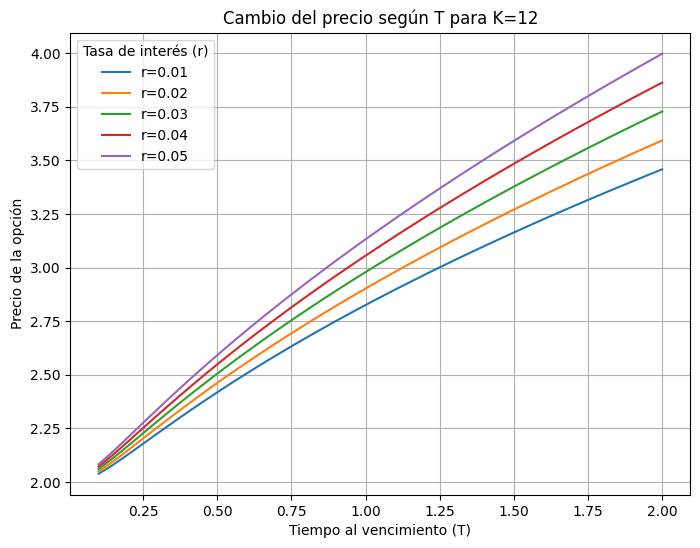

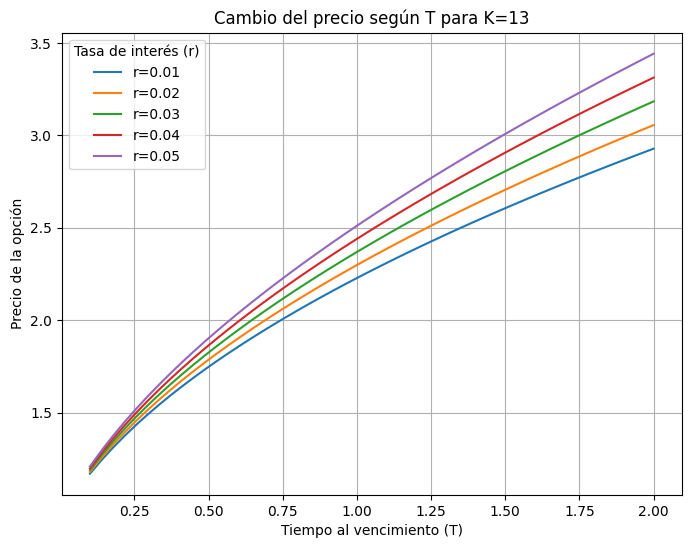

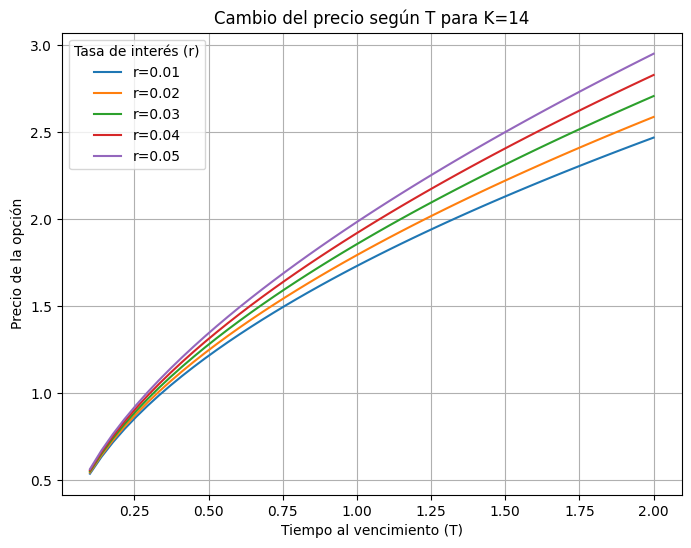

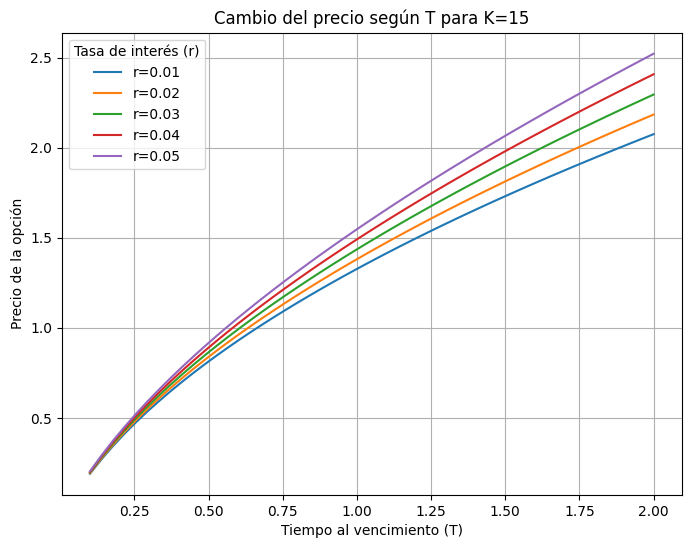

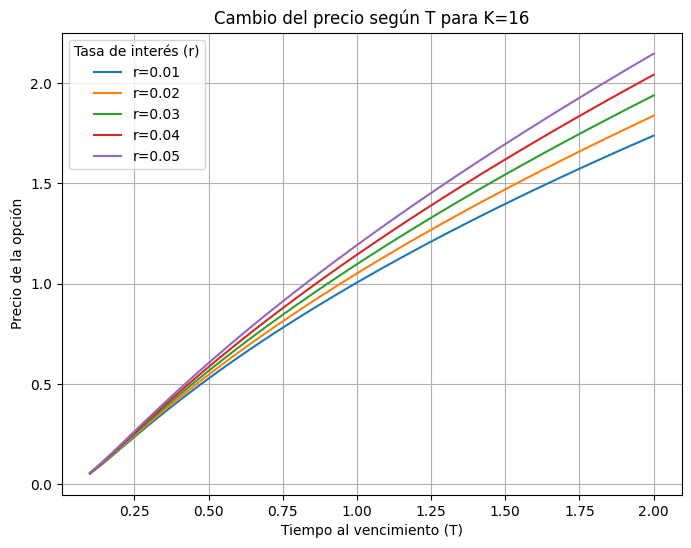

In [ ]:
times = np.linspace(0.1, 2, 50)  # Rango continuo de plazos (T)

# Graficar el precio según T, para cada combinación de K y r
for K in strike_values:
    plt.figure(figsize=(8, 6))
    for r in interest_rates:
        prices = [black_scholes_call(S0, K, r, sigma, d, T) for T in times]
        plt.plot(times, prices, label=f"r={r:.2f}")
    plt.title(f"Cambio del precio según T para K={K}")
    plt.xlabel("Tiempo al vencimiento (T)")
    plt.ylabel("Precio de la opción")
    plt.legend(title="Tasa de interés (r)")
    plt.grid()
    plt.show()

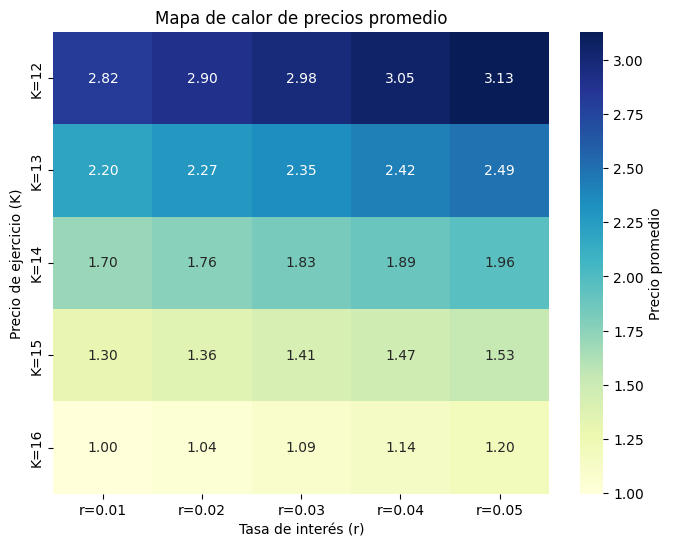

In [ ]:
# Crear un DataFrame para almacenar los precios promedio
heatmap_data = []

# Calcular precios promedio para cada combinación de K y r
for K in strike_values:
    row = []
    for r in interest_rates:
        prices = [black_scholes_call(S0, K, r, sigma, d, T) for T in times]
        avg_price = np.mean(prices)  # Promedio sobre todos los valores de T
        row.append(avg_price)
    heatmap_data.append(row)

# Convertir los datos en un DataFrame
heatmap_df = pd.DataFrame(heatmap_data, columns=[f"r={r:.2f}" for r in interest_rates], index=[f"K={K}" for K in strike_values])

# Graficar el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Precio promedio'})
plt.title("Mapa de calor de precios promedio")
plt.xlabel("Tasa de interés (r)")
plt.ylabel("Precio de ejercicio (K)")
plt.show()

#### Conclusiones:

**Variación en función del cambio de T (Tiempo hasta el vencimiento):**
Comparando los precios para T = 0.5 y T = 1 para un mismo K y r, se observa:
Tendencia general: A medida que T aumenta, el precio de la opción Call también incrementa, independientemente del valor de K o r.
Motivo: Este aumento se debe al valor temporal adicional. Una opción con más tiempo hasta el vencimiento tiene más posibilidades de generar beneficios, lo que incrementa su precio.

**Variación en función del cambio de r (Tasa de interés):**
Para un mismo T y K, el precio de la opción Call aumenta ligeramente conforme aumenta r.
Motivo: Una mayor tasa de interés reduce el valor presente del precio de ejercicio (K), lo que hace que las opciones Call sean más valiosas, ya que el costo futuro de ejercerlas es menor.

**Variación en función del cambio de K (Precio de ejercicio):**
Para un mismo T y r, el precio de la opción Call disminuye notablemente conforme aumenta K.
Motivo: Un precio de ejercicio más alto hace que la opción sea menos probable de generar ganancias, reduciendo su valor.

# Tablas de la put para T=0.5 y T=1:

In [ ]:
# Datos
r = 0.03  # Tasa libre de riesgo
K = 14  # Strike price
T_values = [1, 2, 3]  # Tiempos al vencimiento
sigma = 0.3  # Volatilidad
S0 = 14  # Precio inicial del subyacente
d = 0  # Tasa de dividendos

rc=math.log(1+r) # tasa de interés en tiempo continuo
dc=math.log(1+d)

In [ ]:
# Crear tablas para los plazos T=0.5 y T=1
tablas = {}
for T in tiempos:
    tabla = []
    for K in strike_values:
        row = [black_scholes_put(S0, K, r, sigma, d, T) for r in interest_rates]
        tabla.append(row)
    tablas[T] = pd.DataFrame(tabla, columns=[f"r={r:.2f}" for r in interest_rates], index=[f"K={K}" for K in strike_values])


# Mostrar las tablas
for T, tabla in tablas.items():
    print(f"\nValores para T={T}:")
    print(tabla)


Valores para T=0.5:
        r=0.01    r=0.02    r=0.03    r=0.04    r=0.05
K=12  0.358508  0.343486  0.329109  0.315350  0.302182
K=13  0.683170  0.658355  0.634456  0.611440  0.589273
K=14  1.145229  1.109064  1.074048  1.040144  1.007318
K=15  1.739432  1.691462  1.644811  1.599444  1.555325
K=16  2.447970  2.388654  2.330765  2.274268  2.219131

Valores para T=1:
        r=0.01    r=0.02    r=0.03    r=0.04    r=0.05
K=12  0.706514  0.666949  0.629510  0.594091  0.560590
K=13  1.099612  1.043871  0.990803  0.940294  0.892229
K=14  1.592631  1.519248  1.449020  1.381828  1.317554
K=15  2.178746  2.087096  1.998998  1.914331  1.832980
K=16  2.847381  2.737530  2.631538  2.529289  2.430670


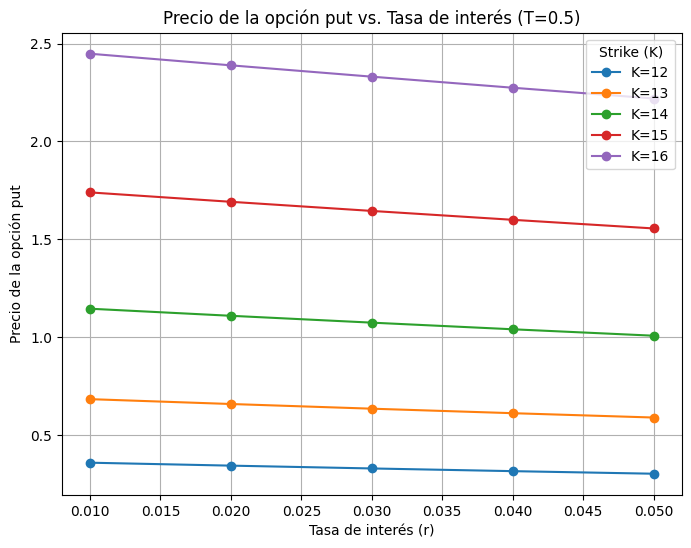

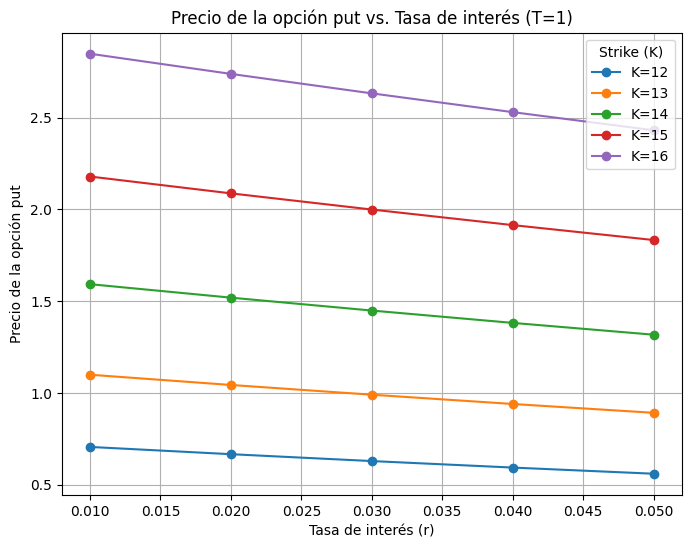

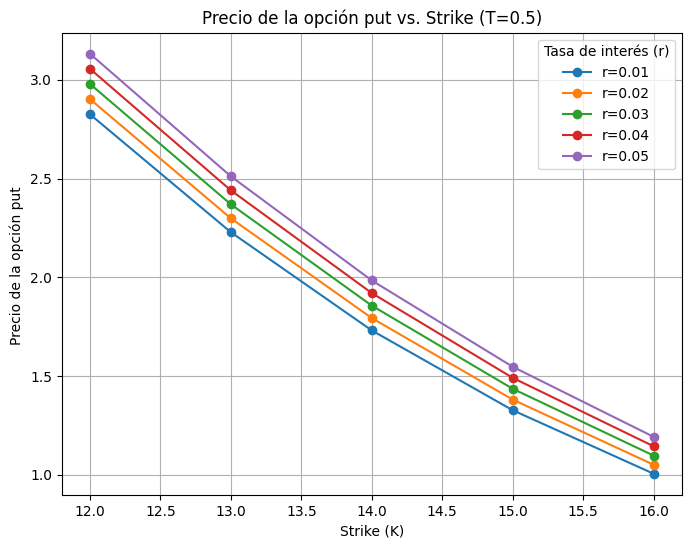

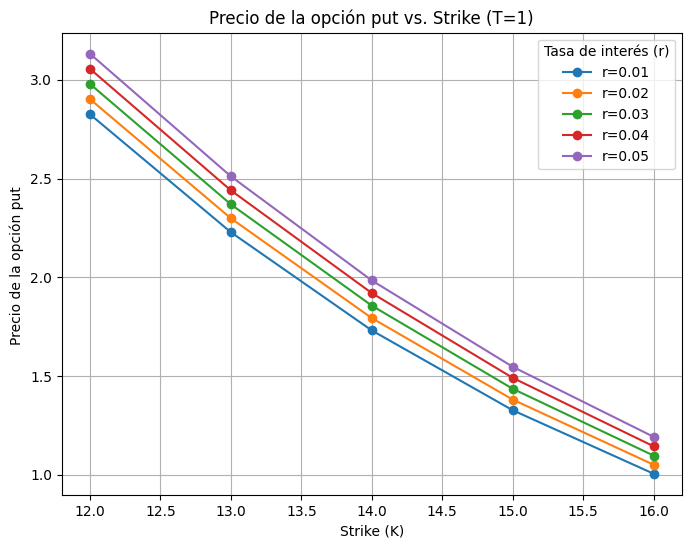

In [ ]:
# Graficar: Precio de la opción vs. r para cada T y K (mantenemos K cte)
for T, tabla in tablas.items():
    plt.figure(figsize=(8, 6))
    for idx, row in tabla.iterrows():
        plt.plot(interest_rates, row, marker='o', label=idx)
    plt.title(f"Precio de la opción put vs. Tasa de interés (T={T})")
    plt.xlabel("Tasa de interés (r)")
    plt.ylabel("Precio de la opción put")
    plt.legend(title="Strike (K)")
    plt.grid()
    plt.show()

# Graficar: Precio de la opción vs. K para cada T y r (mantenemos r cte)
for T, tabla in tablas.items():
    plt.figure(figsize=(8, 6))
    for col in tabla.columns:
        plt.plot(strike_values, table[col], marker='o', label=col)
    plt.title(f"Precio de la opción put vs. Strike (T={T})")
    plt.xlabel("Strike (K)")
    plt.ylabel("Precio de la opción put ")
    plt.legend(title="Tasa de interés (r)")
    plt.grid()
    plt.show()

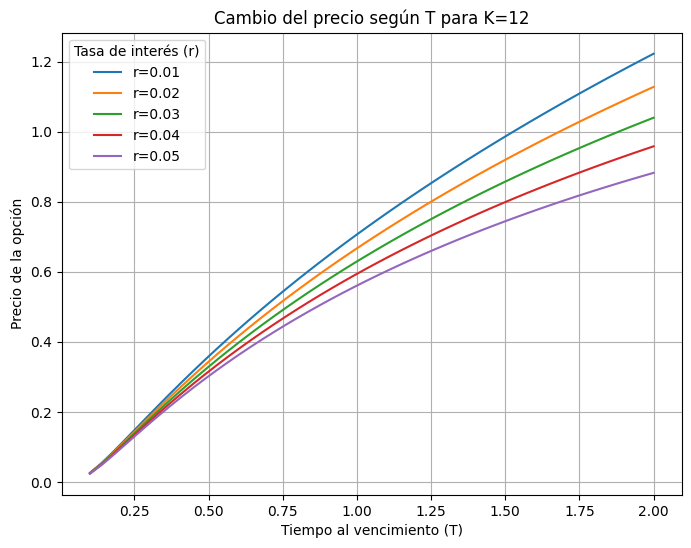

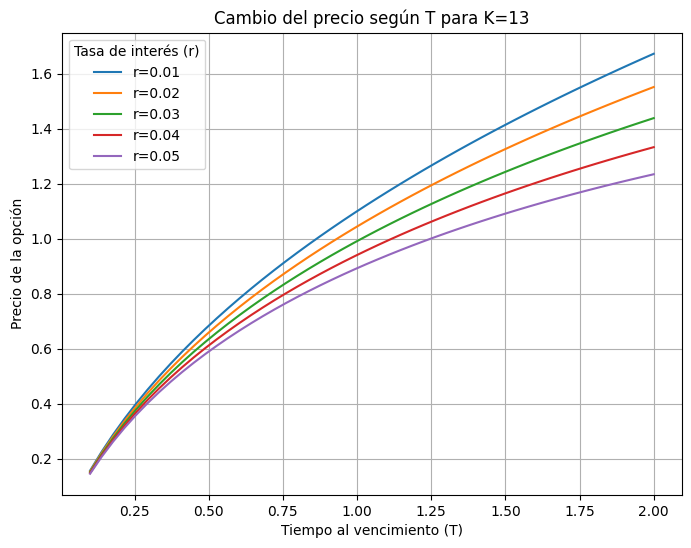

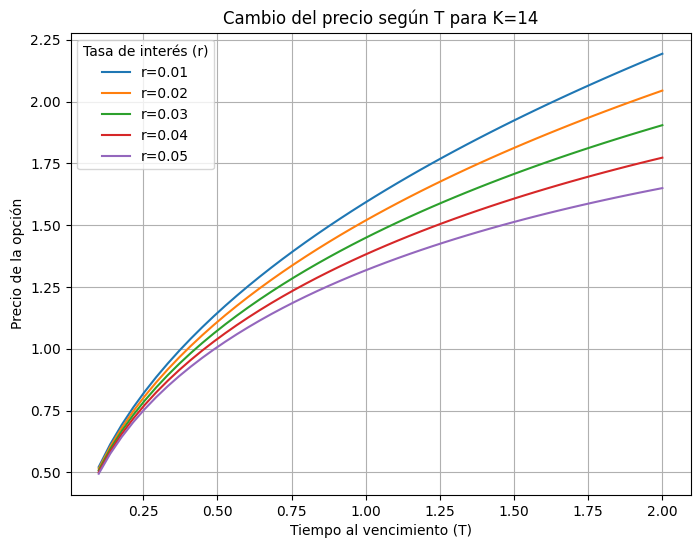

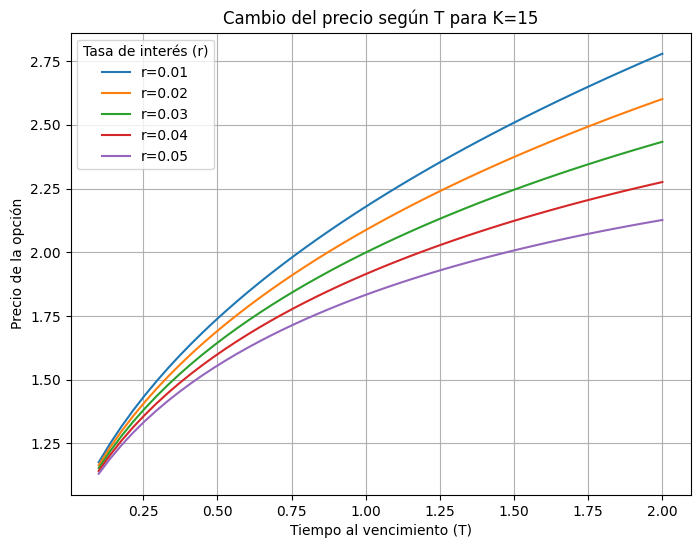

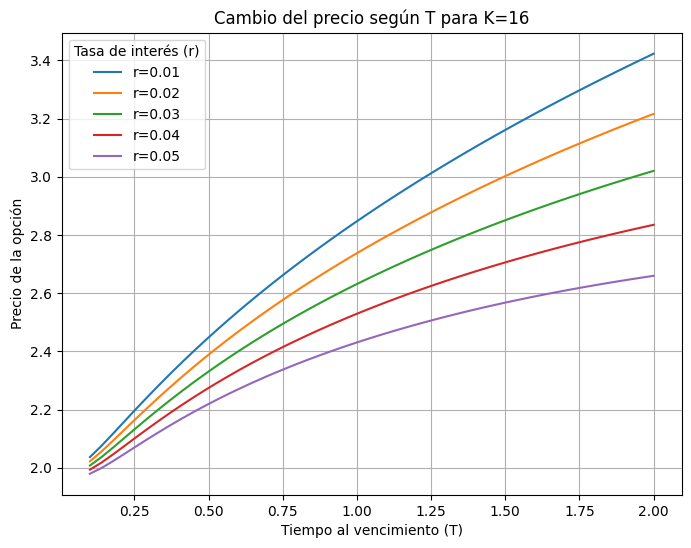

In [ ]:
times = np.linspace(0.1, 2, 50)  # Rango continuo de plazos (T)

# Graficar el precio según T, para cada combinación de K y r
for K in strike_values:
    plt.figure(figsize=(8, 6))
    for r in interest_rates:
        prices = [black_scholes_put(S0, K, r, sigma, d, T) for T in times]
        plt.plot(times, prices, label=f"r={r:.2f}")
    plt.title(f"Cambio del precio según T para K={K}")
    plt.xlabel("Tiempo al vencimiento (T)")
    plt.ylabel("Precio de la opción")
    plt.legend(title="Tasa de interés (r)")
    plt.grid()
    plt.show()

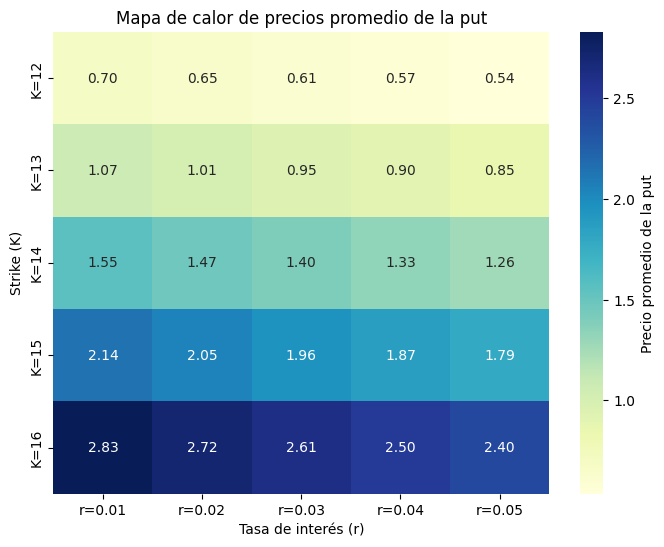

In [ ]:
# Crear un DataFrame para almacenar los precios promedio
heatmap_data = []

# Calcular precios promedio para cada combinación de K y r
for K in strike_values:
    row = []
    for r in interest_rates:
        prices = [black_scholes_put(S0, K, r, sigma, d, T) for T in times]
        avg_price = np.mean(prices)  # Promedio sobre todos los valores de T
        row.append(avg_price)
    heatmap_data.append(row)

# Convertir los datos en un DataFrame
heatmap_df = pd.DataFrame(heatmap_data, columns=[f"r={r:.2f}" for r in interest_rates], index=[f"K={K}" for K in strike_values])

# Graficar el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Precio promedio de la put'})
plt.title("Mapa de calor de precios promedio de la put")
plt.xlabel("Tasa de interés (r)")
plt.ylabel("Strike (K)")
plt.show()

#### Conclusiones:

**Variación en función del cambio de T (Tiempo hasta el vencimiento):**
Comparando los precios para T = 0.5 y T = 1 para un mismo K y r, se observa:
Tendencia general: A medida que T aumenta, el precio de la opción Put también incrementa.
Motivo: Esto se debe al mayor valor temporal adicional que incrementa la probabilidad de que la opción genere beneficios.

**Variación en función del cambio de r (Tasa de interés):**
Para un mismo T y K, el precio de la opción Put disminuye conforme r aumenta.
Motivo: Una mayor tasa de interés disminuye el valor presente del precio de ejercicio (K), haciendo menos valiosas las opciones Put, ya que el costo de ejercerlas es menor.

**Variación en función del cambio de K (Precio de ejercicio):**
Para un mismo T y r, el precio de la opción Put aumenta significativamente conforme K se incrementa.
Motivo: Un precio de ejercicio más alto incrementa la probabilidad de que la opción genere beneficios, aumentando su valor.

Finalmente, observando los dos mapas de calor concluimos que las opciones Put y Call tienen un comportamiento opuesto respecto a K y r, debido a las diferentes posiciones que protegen.
* Para K: Las Puts valen más con K alto, mientras que las Calls valen más con K bajo.
* Para r: Las Puts pierden valor a medida que sube r, mientras que las Calls ganan valor.

Esto está alineado con la relación de paridad de opciones y la dinámica de descuento en la evaluación de precios de Black-Scholes.

# Variación de sigma para call:

In [ ]:
# Datos
r = 0.03  # Tasa libre de riesgo
K = 14  # Strike price
T_values = [1, 2, 3]  # Tiempos al vencimiento
sigma = 0.3  # Volatilidad
S0 = 14  # Precio inicial del subyacente
d = 0  # Tasa de dividendos

rc=math.log(1+r) # tasa de interés en tiempo continuo
dc=math.log(1+d)

## Variando sigma y r:

In [ ]:
sigma_values = [0.1,0.2, 0.3, 0.4, 0.5]  # Valores de volatilidad

# Crear tablas para los plazos T=0.5 y T=1
tablos = {}
for T in tiempos:
    tablo = []
    for sig in sigma_values:
        row = [black_scholes_call(S0, K, r, sig, d, T) for r in interest_rates]
        tablo.append(row)
    tablos[T] = pd.DataFrame(tablo, columns=[f"r={r:.2f}" for r in interest_rates], index=[f"sigma={sig}" for sig in sigma_values])


# Mostrar las tablas
for T, tablo in tablos.items():
    print(f"\nValores para T={T}:")
    print(tablo)


Valores para T=0.5:
             r=0.01    r=0.02    r=0.03    r=0.04    r=0.05
sigma=0.1  0.429584  0.465716  0.503176  0.541887  0.581769
sigma=0.2  0.822475  0.856208  0.890381  0.924969  0.959949
sigma=0.3  1.214709  1.246999  1.279438  1.312015  1.344717
sigma=0.4  1.605555  1.636645  1.667745  1.698849  1.729951
sigma=0.5  1.994484  2.024475  2.054398  2.084249  2.114025

Valores para T=1:
             r=0.01    r=0.02    r=0.03    r=0.04    r=0.05
sigma=0.1  0.627575  0.700862  0.777878  0.858322  0.941869
sigma=0.2  1.180334  1.246891  1.314762  1.383855  1.454079
sigma=0.3  1.731245  1.793757  1.856787  1.920289  1.984221
sigma=0.4  2.278266  2.337426  2.396725  2.456139  2.515644
sigma=0.5  2.819935  2.876038  2.932071  2.988020  3.043873


## Variando sigma y K:

In [ ]:
# Crear tablas para los plazos T=0.5 y T=1
tablus = {}
for T in tiempos:
    tablu = []
    for sig in sigma_values:
        row = [black_scholes_call(S0, K, r, sig, d, T) for K in strike_values]
        tablu.append(row)
    tablus[T] = pd.DataFrame(tablu, columns=[f"K={K}" for K in strike_values], index=[f"sigma={sig}" for sig in sigma_values])


# Mostrar las tablas
for T, tablu in tablus.items():
    print(f"\nValores para T={T}:")
    print(tablu)


Valores para T=0.5:
               K=12      K=13      K=14      K=15      K=16
sigma=0.1  2.178605  1.237899  0.503176  0.129564  0.020187
sigma=0.2  2.279109  1.495179  0.890381  0.479990  0.235007
sigma=0.3  2.505158  1.825176  1.279438  0.864872  0.565496
sigma=0.4  2.789297  2.176170  1.667745  1.257799  0.935323
sigma=0.5  3.100049  2.534719  2.054398  1.652615  1.320961

Valores para T=1:
               K=12      K=13      K=14      K=15      K=16
sigma=0.1  2.366096  1.481788  0.777878  0.331633  0.113758
sigma=0.2  2.596675  1.888299  1.314762  0.878018  0.564056
sigma=0.3  2.979025  2.369444  1.856787  1.435891  1.097558
sigma=0.4  3.415013  2.868777  2.396725  1.993195  1.651371
sigma=0.5  3.871552  3.372070  2.932071  2.546387  2.209636


A medida que σ aumenta, los precios de las opciones call aumentan significativamente, independientemente de T o r. La volatilidad es el factor más determinante para aumentar el precio de las opciones call. Altas volatilidades favorecen significativamente a las call en mercados inciertos.

# Variación de sigma para put:

In [ ]:
# Datos
r = 0.03  # Tasa libre de riesgo
K = 14  # Strike price
T_values = [1, 2, 3]  # Tiempos al vencimiento
sigma = 0.3  # Volatilidad
S0 = 14  # Precio inicial del subyacente
d = 0  # Tasa de dividendos

rc=math.log(1+r) # tasa de interés en tiempo continuo
dc=math.log(1+d)

## Variando sigma y r:

In [ ]:
sigma_values = [0.1, 0.2, 0.3, 0.4, 0.5]  # Valores de volatilidad

# Crear tablas para los plazos T=0.5 y T=1
tables = {}
for T in tiempos:
    table = []
    for sig in sigma_values:
        row = [black_scholes_put(S0, K, r, sig, d, T) for r in interest_rates]
        table.append(row)
    tables[T] = pd.DataFrame(table, columns=[f"r={r:.2f}" for r in interest_rates], index=[f"sigma={sig}" for sig in sigma_values])


# Mostrar las tablas
for T, table in tables.items():
    print(f"\nValores para T={T}:")
    print(table)


Valores para T=0.5:
             r=0.01    r=0.02    r=0.03    r=0.04    r=0.05
sigma=0.1  1.934987  1.859453  1.785456  1.713007  1.642120
sigma=0.2  2.128833  2.063738  2.000276  1.938418  1.878139
sigma=0.3  2.447970  2.388654  2.330765  2.274268  2.219131
sigma=0.4  2.812204  2.755760  2.700591  2.646664  2.593947
sigma=0.5  3.195073  3.140064  3.086230  3.033538  2.981960

Valores para T=1:
             r=0.01    r=0.02    r=0.03    r=0.04    r=0.05
sigma=0.1  1.919114  1.780610  1.647738  1.520616  1.399346
sigma=0.2  2.328180  2.210778  2.098037  1.989850  1.886111
sigma=0.3  2.847381  2.737530  2.631538  2.529289  2.430670
sigma=0.4  3.396360  3.289153  3.185352  3.084848  2.987536
sigma=0.5  3.953872  3.847177  3.743616  3.643089  3.545498


## Variando sigma y K:

In [ ]:
# Crear tablas para los plazos T=0.5 y T=1
tables = {}
for T in tiempos:
    table = []
    for sig in sigma_values:
        row = [black_scholes_put(S0, K, r, sig, d, T) for K in strike_values]
        table.append(row)
    tables[T] = pd.DataFrame(table, columns=[f"K={K}" for K in strike_values], index=[f"sigma={sig}" for sig in sigma_values])


# Mostrar las tablas
for T, table in tables.items():
    print(f"\nValores para T={T}:")
    print(table)


Valores para T=0.5:
               K=12      K=13      K=14      K=15      K=16
sigma=0.1  0.002557  0.047180  0.297786  0.909503  1.785456
sigma=0.2  0.103060  0.304460  0.684990  1.259930  2.000276
sigma=0.3  0.329109  0.634456  1.074048  1.644811  2.330765
sigma=0.4  0.613248  0.985451  1.462355  2.037739  2.700591
sigma=0.5  0.924001  1.343999  1.849008  2.432554  3.086230

Valores para T=1:
               K=12      K=13      K=14      K=15      K=16
sigma=0.1  0.016582  0.103147  0.370111  0.894740  1.647738
sigma=0.2  0.247160  0.509658  0.906995  1.441125  2.098037
sigma=0.3  0.629510  0.990803  1.449020  1.998998  2.631538
sigma=0.4  1.065498  1.490136  1.988958  2.556302  3.185352
sigma=0.5  1.522037  1.993429  2.524304  3.109494  3.743616


La volatilidad es el factor más determinante para aumentar el precio de las puts. Opciones con alta volatilidad rinden más en mercados inciertos.

<font size="4" color=blue>**Apartado b**</font>
***
Obtener mediante simulación el valor de una opción call asiática browniana con dividendos y vencimiento T. Dar la estimación del valor y la precisión. Utilizar los mismos datos que en la práctica anterior y comparar el resultado con los resultados obtenidos en esa práctica.

<font size="2" color=grey>**Nota para comprobación:** $t=1; V_{\mathrm{call}}=1.213168;Varianza=3.244590;Precisión=0.111778$.</font>

Recordamos los datos que teníamos:

In [ ]:
# Datos
r = 0.03  # Tasa libre de riesgo
K = 14  # Strike price
T_values = [1, 2, 3]  # Tiempos al vencimiento
sigma = 0.3  # Volatilidad
S0 = 14  # Precio inicial del subyacente
d = 0  # Tasa de dividendos

rc=math.log(1+r) # tasa de interés en tiempo continuo
dc=math.log(1+d)

delta = 1 / 12  # Paso temporal: 1 mes
alpha = 0.05  # Nivel de confianza (95%)
N = 1000  # Número de simulaciones
x0 = 123456789  # Semilla inicial

# Con la ecuación estocástica:

In [ ]:
resultados = {}

for T in T_values:
    num_steps = int(T / delta)  # Número de pasos en el tiempo
    payoff_call = []  # Reiniciar para cada T
    payoff_put = []  # Reiniciar para cada T
    x0 = 123456789  # Semilla inicial

    for _ in range(N):
        S = S0  # Precio inicial
        prices = []  # Reiniciar para cada trayectoria

        # Simulación paso a paso
        for _ in range(num_steps):
            z1, z2, x0 = BoxMuller(x0)
            S = S*(1+r-d)**delta + sigma*S*np.sqrt(delta)*z2
            prices.append(S)

        # Promedio asiático para la trayectoria
        promedio_precios = np.mean(prices)

        # Calcular y almacenar los payoffs
        payoff_call.append(max(promedio_precios - K, 0))
        payoff_put.append(max(K - promedio_precios, 0))

    # Calcular la media de los payoffs
    media_call = np.mean(payoff_call)
    media_put = np.mean(payoff_put)

    # Traer el valor al presente
    V_call = np.exp(-rc * T) * media_call
    V_put = np.exp(-rc * T) * media_put

    # Calcular la varianza de los payoffs
    varianza_payoff_call = np.var(payoff_call, ddof=1)
    varianza_payoff_put = np.var(payoff_put, ddof=1)

    # Calcular las varianzas de los valores de las opciones
    varianza_V_call = varianza_payoff_call * np.exp(-2 * rc * T)
    varianza_V_put = varianza_payoff_put * np.exp(-2 * rc * T)

    # Calcular la precisión (intervalos de confianza)
    precision_call = t.ppf(1 - alpha / 2, df=N - 1) * np.sqrt(varianza_payoff_call / N) * np.exp(-rc * T)
    precision_put = t.ppf(1 - alpha / 2, df=N - 1) * np.sqrt(varianza_payoff_put / N) * np.exp(-rc * T)

    # Guardar resultados
    resultados[T] = {
        "V_call": V_call,
        "varianza_call": varianza_V_call,
        "precision_call": precision_call,
        "V_put": V_put,
        "varianza_put": varianza_V_put,
        "precision_put": precision_put,
    }

# Mostrar resultados
for T, res in resultados.items():
    print(f"\nResultados para T={T}:")
    print(f"Valor estimado Call: {res['V_call']}")
    print(f"Varianza Call: {res['varianza_call']}")
    print(f"Precisión Call: {res['precision_call']}")
    print(f"Valor estimado Put: {res['V_put']}")
    print(f"Varianza Put: {res['varianza_put']}")
    print(f"Precisión Put: {res['precision_put']}")



Resultados para T=1:
Valor estimado Call: 1.2131682149279632
Varianza Call: 3.2445903696089724
Precisión Call: 0.11177753224400995
Valor estimado Put: 0.8354568892950778
Varianza Put: 1.427481777220789
Precisión Put: 0.07414124359900628

Resultados para T=2:
Valor estimado Call: 1.6396623287584629
Varianza Call: 7.295765648668327
Precisión Call: 0.16761389471403448
Valor estimado Put: 1.1131209198212717
Varianza Put: 2.3188160889932683
Precisión Put: 0.09449476132473858

Resultados para T=3:
Valor estimado Call: 1.9160658385576608
Varianza Call: 10.380625658743789
Precisión Call: 0.1999338573162425
Valor estimado Put: 1.3126217630068155
Varianza Put: 3.1038663054756097
Precisión Put: 0.10932666069427888


La diferencia entre los valores de las opciones asiáticas y las opciones europeas se debe a la forma en que se calcula el precio de liquidación en las opciones asiáticas. En las opciones europeas, el precio de ejercicio depende del valor puntual del subyacente al vencimiento, mientras que en las opciones asiáticas, el precio de ejercicio se basa en el promedio del subyacente durante el período de la opción. Esta diferencia en el cálculo hace que el precio de la opción asiática sea menor. Las opciones asiáticas protegen parcialmente contra la manipulación de precios al vencimiento (un problema en mercados poco líquidos).
Sin embargo, al eliminar parte de esa volatilidad de corto plazo, los participantes del mercado aceptan un precio de opción más bajo.
Los valores de las opciones asiáticas son consistentemente menores que los de las opciones europeas.
La diferencia aumenta con el tiempo T porque, a medida que se promedian más precios en el tiempo, la volatilidad efectiva disminuye aún más.

# Lema de Itô:

In [ ]:
resultados = {}

for T in T_values:
    num_steps = int(T / delta)  # Número de pasos en el tiempo
    payoff_call = []  # Reiniciar para cada T
    payoff_put = []  # Reiniciar para cada T
    x0 = 123456789  # Semilla inicial

    for _ in range(N):
        S = S0  # Precio inicial
        prices = []  # Reiniciar para cada trayectoria

        # Simulación paso a paso
        for _ in range(num_steps):
            z1, z2, x0 = BoxMuller(x0)
            S = S * np.exp((rc - dc - 0.5 * sigma**2) * delta + sigma * np.sqrt(delta) * z2)
            prices.append(S)

        # Promedio asiático para la trayectoria
        promedio_precios = np.mean(prices)

        # Calcular y almacenar los payoffs
        payoff_call.append(max(promedio_precios - K, 0))
        payoff_put.append(max(K - promedio_precios, 0))

    # Calcular la media de los payoffs
    media_call = np.mean(payoff_call)
    media_put = np.mean(payoff_put)

    # Traer el valor al presente
    V_call = np.exp(-rc * T) * media_call
    V_put = np.exp(-rc * T) * media_put

    # Calcular la varianza de los payoffs
    varianza_payoff_call = np.var(payoff_call, ddof=1)
    varianza_payoff_put = np.var(payoff_put, ddof=1)

    # Calcular las varianzas de los valores de las opciones
    varianza_V_call = varianza_payoff_call * np.exp(-2 * rc * T)
    varianza_V_put = varianza_payoff_put * np.exp(-2 * rc * T)

    # Calcular la precisión (intervalos de confianza)
    precision_call = t.ppf(1 - alpha / 2, df=N - 1) * np.sqrt(varianza_payoff_call / N) * np.exp(-rc * T)
    precision_put = t.ppf(1 - alpha / 2, df=N - 1) * np.sqrt(varianza_payoff_put / N) * np.exp(-rc * T)

    # Guardar resultados
    resultados[T] = {
        "V_call": V_call,
        "varianza_call": varianza_V_call,
        "precision_call": precision_call,
        "V_put": V_put,
        "varianza_put": varianza_V_put,
        "precision_put": precision_put,
    }

# Mostrar resultados
for T, res in resultados.items():
    print(f"\nResultados para T={T}:")
    print(f"Valor estimado Call: {res['V_call']}")
    print(f"Varianza Call: {res['varianza_call']}")
    print(f"Precisión Call: {res['precision_call']}")
    print(f"Valor estimado Put: {res['V_put']}")
    print(f"Varianza Put: {res['varianza_put']}")
    print(f"Precisión Put: {res['precision_put']}")



Resultados para T=1:
Valor estimado Call: 1.2179687883056471
Varianza Call: 3.386502564834079
Precisión Call: 0.11419584023408802
Valor estimado Put: 0.8328062071883651
Varianza Put: 1.3836508106836158
Precisión Put: 0.07299411220995393

Resultados para T=2:
Valor estimado Call: 1.6425552149385085
Varianza Call: 7.549859937027102
Precisión Call: 0.17050771221230115
Valor estimado Put: 1.1139792388740217
Varianza Put: 2.2823860994307514
Precisión Put: 0.09374953811365933

Resultados para T=3:
Valor estimado Call: 1.9094501517463711
Varianza Call: 10.639209734184453
Precisión Call: 0.20240874171912812
Valor estimado Put: 1.3117484021631631
Varianza Put: 3.0364644513334023
Precisión Put: 0.10813310666202651


Los precios de las opciones asiáticas siguen siendo notablemente más bajos que los de las europeas, lo cual es consistente con el hecho de que el promedio reduce la volatilidad efectiva.
Los valores para T=1,2,3 usando el lema de Itô son muy similares a los obtenidos mediante la ecuación estocástica. Por tanto, Los valores del lema de Itô y la ecuación estocástica son consistentes y están dentro de las tolerancias establecidas por la precisión.

**Conclusión General**
* Opciones asiáticas:

Rinden más en mercados estables o con necesidades de cobertura promedio.
Menor costo inicial y menor sensibilidad a la volatilidad extrema.

* Opciones europeas:

Rinden más en mercados volátiles o en estrategias especulativas.
Mayor apalancamiento y sensibilidad a eventos extremos.